In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.svm as svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

# 使用pandas库读取data文件夹中的数据表格，并查看数据表基本信息，进行数据集成

In [ ]:
station_data = pd.read_csv('./data/station_data.csv')

In [ ]:
station_data

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose
...,...,...,...,...,...,...
71,77,Market at Sansome,37.789625,-122.400811,27,San Francisco
72,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose
73,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco
74,83,Mezes Park,37.491269,-122.236234,15,Redwood City


In [ ]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          76 non-null     int64  
 1   Name        76 non-null     object 
 2   Lat         76 non-null     float64
 3   Long        76 non-null     float64
 4   Dock Count  76 non-null     int64  
 5   City        76 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.7+ KB


In [ ]:
weather_data = pd.read_csv('./data/weather_data.csv')

In [ ]:
weather_data#统计值的类别 对于没有记录的情况就是能见度正常

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,27/08/2015,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,10.0,10.0,23.0,6.0,29.0,0.0,3.0,NaN,313.0,95113
1821,28/08/2015,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,10.0,10.0,25.0,7.0,30.0,0.0,3.0,NaN,307.0,95113
1822,29/08/2015,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,10.0,10.0,21.0,9.0,26.0,0.0,4.0,NaN,312.0,95113
1823,30/08/2015,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,10.0,10.0,22.0,10.0,29.0,0.0,3.0,NaN,291.0,95113


In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1825 non-null   object 
 1   Max TemperatureF           1821 non-null   float64
 2   Mean TemperatureF          1821 non-null   float64
 3   Min TemperatureF           1821 non-null   float64
 4   Max Dew PointF             1775 non-null   float64
 5   MeanDew PointF             1775 non-null   float64
 6   Min DewpointF              1775 non-null   float64
 7   Max Humidity               1775 non-null   float64
 8   Mean Humidity              1775 non-null   float64
 9   Min Humidity               1775 non-null   float64
 10  Max Sea Level PressureIn   1824 non-null   float64
 11  Mean Sea Level PressureIn  1824 non-null   float64
 12  Min Sea Level PressureIn   1824 non-null   float64
 13  Max VisibilityMiles        1820 non-null   float

In [ ]:
pd.value_counts(weather_data['Events'])

Rain                 195
Fog                   73
Fog-Rain              16
Rain-Thunderstorm      3
Name: Events, dtype: int64

In [ ]:
trip_data = pd.read_csv('./data/trip_data.csv')

In [ ]:
trip_data#人员类型不考虑 统计每个车站每小时入站出站车辆数

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer
...,...,...,...,...,...,...
354147,432951,01/09/2014 04:21,39,01/09/2014 04:32,65,Subscriber
354148,432950,01/09/2014 03:16,50,01/09/2014 05:08,70,Customer
354149,432949,01/09/2014 00:05,66,01/09/2014 00:14,57,Customer
354150,432948,01/09/2014 00:05,66,01/09/2014 00:15,57,Customer


In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Trip ID          354152 non-null  int64 
 1   Start Date       354152 non-null  object
 2   Start Station    354152 non-null  int64 
 3   End Date         354152 non-null  object
 4   End Station      354152 non-null  int64 
 5   Subscriber Type  354152 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.2+ MB


站23、25、49、69和72分别变为站85、86、87、88、89（在第二次移动后又变为90）。

In [ ]:
station_rename = {23:85, 25:86, 49:87,69:88,72:90,89:90}

In [ ]:
for key, value in station_rename.items():
    trip_data.loc[trip_data['Start Station']==key , 'Start Station'] =value
    trip_data.loc[trip_data['End Station']==key , 'End Station'] =value
    station_data.loc[station_data['Id']==key , 'Id'] =value

In [ ]:
station_data.sort_values("Id", inplace=True)

In [ ]:
station_data#根据ID重新排序 看出重复的数据

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose
...,...,...,...,...,...,...
61,88,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco
60,88,San Francisco Caltrain 2 (330 Townsend),37.776377,-122.396070,23,San Francisco
65,90,Civic Center BART (7th at Market),37.780353,-122.412260,23,San Francisco
66,90,Civic Center BART (7th at Market),37.781039,-122.411748,23,San Francisco


In [ ]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 64
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          76 non-null     int64  
 1   Name        76 non-null     object 
 2   Lat         76 non-null     float64
 3   Long        76 non-null     float64
 4   Dock Count  76 non-null     int64  
 5   City        76 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.2+ KB


In [ ]:
station_data.drop_duplicates(subset='Id',keep="last",inplace=True)#去除重复数据

In [ ]:
station_data

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose
...,...,...,...,...,...,...
17,85,San Mateo County Center,37.487616,-122.229951,15,Redwood City
19,86,Broadway at Main,37.486725,-122.225551,15,Redwood City
40,87,Spear at Folsom,37.789625,-122.390264,19,San Francisco
60,88,San Francisco Caltrain 2 (330 Townsend),37.776377,-122.396070,23,San Francisco


统计 net rate of bike renting for a given station

In [ ]:
df_nan = pd.DataFrame({'Null Count': trip_data.isnull().sum(),
                        'Null %':trip_data.isna().mean().round(4) * 100},
                      columns=['Null Count' , 'Null %'])
print(df_nan[df_nan['Null Count'] > 0])#此后开始统计 检查是否有空值

Empty DataFrame
Columns: [Null Count, Null %]
Index: []


In [ ]:
trip_data['Start Date']=pd.to_datetime(trip_data ['Start Date'],infer_datetime_format=True)
trip_data['End Date']=pd.to_datetime(trip_data ['End Date'],infer_datetime_format=True)#拆分时间数据2015 8 1

In [ ]:
trip_data

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,2015-08-31 23:26:00,50,2015-08-31 23:39:00,70,Subscriber
1,913459,2015-08-31 23:11:00,31,2015-08-31 23:28:00,27,Subscriber
2,913455,2015-08-31 23:13:00,47,2015-08-31 23:18:00,64,Subscriber
3,913454,2015-08-31 23:10:00,10,2015-08-31 23:17:00,8,Subscriber
4,913453,2015-08-31 23:09:00,51,2015-08-31 23:22:00,60,Customer
...,...,...,...,...,...,...
354147,432951,2014-09-01 04:21:00,39,2014-09-01 04:32:00,65,Subscriber
354148,432950,2014-09-01 03:16:00,50,2014-09-01 05:08:00,70,Customer
354149,432949,2014-09-01 00:05:00,66,2014-09-01 00:14:00,57,Customer
354150,432948,2014-09-01 00:05:00,66,2014-09-01 00:15:00,57,Customer


In [ ]:
trip_data['start_date'] = trip_data['Start Date'].dt.date

In [ ]:
trip_data['start_year'] =  pd.DatetimeIndex(trip_data['start_date']).year
trip_data['start_month'] =  pd.DatetimeIndex(trip_data['start_date']).month
trip_data['start_day'] =  pd.DatetimeIndex(trip_data['start_date']).day
trip_data['start_hour'] =pd.to_datetime(trip_data['Start Date']).dt.hour

In [ ]:
trip_data['end_date'] = trip_data['End Date'].dt.date

In [ ]:
trip_data['end_year'] =  pd.DatetimeIndex(trip_data['end_date']).year
trip_data['end_month'] =  pd.DatetimeIndex(trip_data['end_date']).month
trip_data['end_day'] =  pd.DatetimeIndex(trip_data['end_date']).day
trip_data['end_hour'] =pd.to_datetime(trip_data['End Date']).dt.hour#完全拆分数据

In [ ]:
trip_data['weekend'] =(pd.to_datetime(trip_data['Start Date']).dt.weekday>=5).astype(int)#可删

In [ ]:
trip_data#查看 变为17列 （原来为6列）

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,start_date,start_year,start_month,start_day,start_hour,end_date,end_year,end_month,end_day,end_hour,weekend
0,913460,2015-08-31 23:26:00,50,2015-08-31 23:39:00,70,Subscriber,2015-08-31,2015,8,31,23,2015-08-31,2015,8,31,23,0
1,913459,2015-08-31 23:11:00,31,2015-08-31 23:28:00,27,Subscriber,2015-08-31,2015,8,31,23,2015-08-31,2015,8,31,23,0
2,913455,2015-08-31 23:13:00,47,2015-08-31 23:18:00,64,Subscriber,2015-08-31,2015,8,31,23,2015-08-31,2015,8,31,23,0
3,913454,2015-08-31 23:10:00,10,2015-08-31 23:17:00,8,Subscriber,2015-08-31,2015,8,31,23,2015-08-31,2015,8,31,23,0
4,913453,2015-08-31 23:09:00,51,2015-08-31 23:22:00,60,Customer,2015-08-31,2015,8,31,23,2015-08-31,2015,8,31,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,2014-09-01 04:21:00,39,2014-09-01 04:32:00,65,Subscriber,2014-09-01,2014,9,1,4,2014-09-01,2014,9,1,4,0
354148,432950,2014-09-01 03:16:00,50,2014-09-01 05:08:00,70,Customer,2014-09-01,2014,9,1,3,2014-09-01,2014,9,1,5,0
354149,432949,2014-09-01 00:05:00,66,2014-09-01 00:14:00,57,Customer,2014-09-01,2014,9,1,0,2014-09-01,2014,9,1,0,0
354150,432948,2014-09-01 00:05:00,66,2014-09-01 00:15:00,57,Customer,2014-09-01,2014,9,1,0,2014-09-01,2014,9,1,0,0


In [ ]:
trip_data.columns = trip_data.columns.str.replace(" ", "_")#空格替换为下划线

In [ ]:
trip_data = trip_data.drop(labels='Start_Date',axis=1)
trip_data = trip_data.drop(labels='End_Date',axis=1)
trip_data = trip_data.drop(labels='start_date',axis=1)
trip_data = trip_data.drop(labels='end_date',axis=1)#删除不必要的列

In [ ]:
trip_data#删除之后还剩13列

,Trip_ID,Start_Station,End_Station,Subscriber_Type,start_year,start_month,start_day,start_hour,end_year,end_month,end_day,end_hour,weekend
0,913460,50,70,Subscriber,2015,8,31,23,2015,8,31,23,0
1,913459,31,27,Subscriber,2015,8,31,23,2015,8,31,23,0
2,913455,47,64,Subscriber,2015,8,31,23,2015,8,31,23,0
3,913454,10,8,Subscriber,2015,8,31,23,2015,8,31,23,0
4,913453,51,60,Customer,2015,8,31,23,2015,8,31,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,39,65,Subscriber,2014,9,1,4,2014,9,1,4,0
354148,432950,50,70,Customer,2014,9,1,3,2014,9,1,5,0
354149,432949,66,57,Customer,2014,9,1,0,2014,9,1,0,0
354150,432948,66,57,Customer,2014,9,1,0,2014,9,1,0,0


In [ ]:
df = trip_data

In [ ]:
df1 = df.drop(labels='End_Station', axis=1)
df1 = df1.drop(labels='end_year', axis=1)
df1 = df1.drop(labels='end_month', axis=1)
df1 = df1.drop(labels='end_day', axis=1)
df1 = df1.drop(labels='end_hour', axis=1)
df1 = df1.drop(labels='Subscriber_Type', axis=1)

In [ ]:
df1

,Trip_ID,Start_Station,start_year,start_month,start_day,start_hour,weekend
0,913460,50,2015,8,31,23,0
1,913459,31,2015,8,31,23,0
2,913455,47,2015,8,31,23,0
3,913454,10,2015,8,31,23,0
4,913453,51,2015,8,31,23,0
...,...,...,...,...,...,...,...
354147,432951,39,2014,9,1,4,0
354148,432950,50,2014,9,1,3,0
354149,432949,66,2014,9,1,0,0
354150,432948,66,2014,9,1,0,0


In [ ]:
df_1 = df1.drop(labels='weekend',axis=1)

In [ ]:
df_1

,Trip_ID,Start_Station,start_year,start_month,start_day,start_hour
0,913460,50,2015,8,31,23
1,913459,31,2015,8,31,23
2,913455,47,2015,8,31,23
3,913454,10,2015,8,31,23
4,913453,51,2015,8,31,23
...,...,...,...,...,...,...
354147,432951,39,2014,9,1,4
354148,432950,50,2014,9,1,3
354149,432949,66,2014,9,1,0
354150,432948,66,2014,9,1,0


In [ ]:
df3 = df_1.groupby(['Start_Station', 'start_year', 'start_month', 'start_day', 'start_hour'], as_index=False).count()

In [ ]:
df3#统计开始时间（站点 年月日 小时 为索引 对trip id（进入站点的车的数量）统计）

,Start_Station,start_year,start_month,start_day,start_hour,Trip_ID
0,2,2014,9,1,12,1
1,2,2014,9,1,21,4
2,2,2014,9,1,22,1
3,2,2014,9,2,1,1
4,2,2014,9,2,7,3
...,...,...,...,...,...,...
142510,90,2015,8,31,13,5
142511,90,2015,8,31,16,3
142512,90,2015,8,31,17,2
142513,90,2015,8,31,18,1


In [ ]:
df2 = df.drop(labels='Start_Station',axis=1)
df2 = df2.drop(labels='start_year', axis=1)
df2 = df2.drop(labels='start_month', axis=1)
df2 = df2.drop(labels='start_day', axis=1)
df2 = df2.drop(labels='start_hour', axis=1)
df2 = df2.drop(labels='Subscriber_Type', axis=1)

In [ ]:
df2

,Trip_ID,End_Station,end_year,end_month,end_day,end_hour,weekend
0,913460,70,2015,8,31,23,0
1,913459,27,2015,8,31,23,0
2,913455,64,2015,8,31,23,0
3,913454,8,2015,8,31,23,0
4,913453,60,2015,8,31,23,0
...,...,...,...,...,...,...,...
354147,432951,65,2014,9,1,4,0
354148,432950,70,2014,9,1,5,0
354149,432949,57,2014,9,1,0,0
354150,432948,57,2014,9,1,0,0


In [ ]:
df_2 = df2.drop(labels='weekend',axis=1)

In [ ]:
df_2

,Trip_ID,End_Station,end_year,end_month,end_day,end_hour
0,913460,70,2015,8,31,23
1,913459,27,2015,8,31,23
2,913455,64,2015,8,31,23
3,913454,8,2015,8,31,23
4,913453,60,2015,8,31,23
...,...,...,...,...,...,...
354147,432951,65,2014,9,1,4
354148,432950,70,2014,9,1,5
354149,432949,57,2014,9,1,0
354150,432948,57,2014,9,1,0


In [ ]:
df_2.rename(columns={'End_Station': 'Start_Station'}, inplace=True)

In [ ]:
df_2

,Trip_ID,Start_Station,end_year,end_month,end_day,end_hour
0,913460,70,2015,8,31,23
1,913459,27,2015,8,31,23
2,913455,64,2015,8,31,23
3,913454,8,2015,8,31,23
4,913453,60,2015,8,31,23
...,...,...,...,...,...,...
354147,432951,65,2014,9,1,4
354148,432950,70,2014,9,1,5
354149,432949,57,2014,9,1,0
354150,432948,57,2014,9,1,0


In [ ]:
df4 = df_2.groupby(['Start_Station', 'end_year', 'end_month', 'end_day', 'end_hour'], as_index=False).count()

In [ ]:
df4#38-45 以结束站点 年月日 小时 为索引 对trip id统计（此处start-station实际为end-station）

,Start_Station,end_year,end_month,end_day,end_hour,Trip_ID
0,2,2014,9,1,14,1
1,2,2014,9,2,6,3
2,2,2014,9,2,7,6
3,2,2014,9,2,8,1
4,2,2014,9,2,9,2
...,...,...,...,...,...,...
138660,90,2015,8,31,13,2
138661,90,2015,8,31,16,3
138662,90,2015,8,31,17,7
138663,90,2015,8,31,18,1


In [ ]:
df3.rename(columns={'start_year': 'year', 'start_month': 'month', 'start_day': 'day', 'start_hour': 'hour', 'Trip_ID': 'Go_out_count'}, inplace=True)#46

In [ ]:
df4.rename(columns={'end_year': 'year', 'end_month': 'month', 'end_day': 'day', 'end_hour': 'hour', 'Trip_ID': 'Enter_count'}, inplace=True)

In [ ]:
df5 = pd.merge(df3, df4, on=['Start_Station','year', 'month', 'day', 'hour'], how='outer')

In [ ]:
df5#46-49合并 进入信息 离开信息 合并）（有输入的时候 若enter count 为NaN 则视为0）

,Start_Station,year,month,day,hour,Go_out_count,Enter_count
0,2,2014,9,1,12,1.0,NaN
1,2,2014,9,1,21,4.0,NaN
2,2,2014,9,1,22,1.0,NaN
3,2,2014,9,2,1,1.0,NaN
4,2,2014,9,2,7,3.0,6.0
...,...,...,...,...,...,...,...
198151,90,2015,8,29,18,NaN,2.0
198152,90,2015,8,29,23,NaN,1.0
198153,90,2015,8,30,12,NaN,3.0
198154,90,2015,8,30,14,NaN,1.0


In [ ]:
df5.fillna(0, inplace=True)#对空值填充为0 证实假设

In [ ]:
df5#查看填充后的数据

,Start_Station,year,month,day,hour,Go_out_count,Enter_count
0,2,2014,9,1,12,1.0,0.0
1,2,2014,9,1,21,4.0,0.0
2,2,2014,9,1,22,1.0,0.0
3,2,2014,9,2,1,1.0,0.0
4,2,2014,9,2,7,3.0,6.0
...,...,...,...,...,...,...,...
198151,90,2015,8,29,18,0.0,2.0
198152,90,2015,8,29,23,0.0,1.0
198153,90,2015,8,30,12,0.0,3.0
198154,90,2015,8,30,14,0.0,1.0


In [ ]:
df5.eval('Quantity_change = Enter_count - Go_out_count', inplace=True)#到此才得到基本信息（净费率（变化了多少））

In [ ]:
df5

,Start_Station,year,month,day,hour,Go_out_count,Enter_count,Quantity_change
0,2,2014,9,1,12,1.0,0.0,-1.0
1,2,2014,9,1,21,4.0,0.0,-4.0
2,2,2014,9,1,22,1.0,0.0,-1.0
3,2,2014,9,2,1,1.0,0.0,-1.0
4,2,2014,9,2,7,3.0,6.0,3.0
...,...,...,...,...,...,...,...,...
198151,90,2015,8,29,18,0.0,2.0,2.0
198152,90,2015,8,29,23,0.0,1.0,1.0
198153,90,2015,8,30,12,0.0,3.0,3.0
198154,90,2015,8,30,14,0.0,1.0,1.0


In [ ]:
station_data.rename(columns={'Id': 'Start_Station'}, inplace=True)#54

In [ ]:
station_data

,Start_Station,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose
...,...,...,...,...,...,...
17,85,San Mateo County Center,37.487616,-122.229951,15,Redwood City
19,86,Broadway at Main,37.486725,-122.225551,15,Redwood City
40,87,Spear at Folsom,37.789625,-122.390264,19,San Francisco
60,88,San Francisco Caltrain 2 (330 Townsend),37.776377,-122.396070,23,San Francisco


合并站点对应的城市信息，经纬度信息，停靠点信息

In [ ]:
df5 = pd.merge(df5, station_data, on=['Start_Station'], how='left')

In [ ]:
df5#54-57 合并站点信息

,Start_Station,year,month,day,hour,Go_out_count,Enter_count,Quantity_change,Name,Lat,Long,Dock Count,City
0,2,2014,9,1,12,1.0,0.0,-1.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,2,2014,9,1,21,4.0,0.0,-4.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
2,2,2014,9,1,22,1.0,0.0,-1.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
3,2,2014,9,2,1,1.0,0.0,-1.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
4,2,2014,9,2,7,3.0,6.0,3.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198151,90,2015,8,29,18,0.0,2.0,2.0,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco
198152,90,2015,8,29,23,0.0,1.0,1.0,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco
198153,90,2015,8,30,12,0.0,3.0,3.0,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco
198154,90,2015,8,30,14,0.0,1.0,1.0,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco


In [ ]:
trip_data = df5

In [ ]:
trip_data

,Start_Station,year,month,day,hour,Go_out_count,Enter_count,Quantity_change,Name,Lat,Long,Dock Count,City
0,2,2014,9,1,12,1.0,0.0,-1.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,2,2014,9,1,21,4.0,0.0,-4.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
2,2,2014,9,1,22,1.0,0.0,-1.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
3,2,2014,9,2,1,1.0,0.0,-1.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
4,2,2014,9,2,7,3.0,6.0,3.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198151,90,2015,8,29,18,0.0,2.0,2.0,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco
198152,90,2015,8,29,23,0.0,1.0,1.0,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco
198153,90,2015,8,30,12,0.0,3.0,3.0,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco
198154,90,2015,8,30,14,0.0,1.0,1.0,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco


In [ ]:
trip_data = trip_data.drop(labels='Name', axis=1)#删除无用信息（站点名称）

In [ ]:
trip_data

,Start_Station,year,month,day,hour,Go_out_count,Enter_count,Quantity_change,Lat,Long,Dock Count,City
0,2,2014,9,1,12,1.0,0.0,-1.0,37.329732,-121.901782,27,San Jose
1,2,2014,9,1,21,4.0,0.0,-4.0,37.329732,-121.901782,27,San Jose
2,2,2014,9,1,22,1.0,0.0,-1.0,37.329732,-121.901782,27,San Jose
3,2,2014,9,2,1,1.0,0.0,-1.0,37.329732,-121.901782,27,San Jose
4,2,2014,9,2,7,3.0,6.0,3.0,37.329732,-121.901782,27,San Jose
...,...,...,...,...,...,...,...,...,...,...,...,...
198151,90,2015,8,29,18,0.0,2.0,2.0,37.780356,-122.412919,23,San Francisco
198152,90,2015,8,29,23,0.0,1.0,1.0,37.780356,-122.412919,23,San Francisco
198153,90,2015,8,30,12,0.0,3.0,3.0,37.780356,-122.412919,23,San Francisco
198154,90,2015,8,30,14,0.0,1.0,1.0,37.780356,-122.412919,23,San Francisco


天气信息处理

In [ ]:
weather_data.Date = pd.to_datetime(weather_data.Date, format='%d/%m/%Y')
weather_data.rename(columns={"Date": "date"} , inplace =True)
weather_data['year'] =  pd.DatetimeIndex(weather_data['date']).year
weather_data['month'] =  pd.DatetimeIndex(weather_data['date']).month
weather_data['day'] =  pd.DatetimeIndex(weather_data['date']).day
weather_data['weekend'] =(pd.to_datetime(weather_data['date']).dt.weekday>=5).astype(int)#62

In [ ]:
weather_data#63

,date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip,year,month,day,weekend
0,2014-09-01,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,20.0,0.0,0.0,NaN,290.0,94107,2014,9,1,0
1,2014-09-02,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,NaN,0.0,5.0,NaN,290.0,94107,2014,9,2,0
2,2014-09-03,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,24.0,0.0,4.0,NaN,276.0,94107,2014,9,3,0
3,2014-09-04,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,25.0,0.0,5.0,NaN,301.0,94107,2014,9,4,0
4,2014-09-05,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,32.0,0.0,4.0,NaN,309.0,94107,2014,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2015-08-27,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,29.0,0.0,3.0,NaN,313.0,95113,2015,8,27,0
1821,2015-08-28,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,30.0,0.0,3.0,NaN,307.0,95113,2015,8,28,0
1822,2015-08-29,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,26.0,0.0,4.0,NaN,312.0,95113,2015,8,29,1
1823,2015-08-30,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,29.0,0.0,3.0,NaN,291.0,95113,2015,8,30,1


In [ ]:
weather_data = weather_data.drop(labels='date',axis=1)#64

邮编替换成城市

In [ ]:
Zip_to_City = {94107 : 'San Francisco', 94063 : 'Redwood City', 94301 : 'Palo Alto', 94041 : 'Mountain View', 95113 : 'San Jose'}
for key, value in Zip_to_City.items():
    weather_data.loc[weather_data['Zip'] == key, 'Zip']=value
weather_data.rename(columns={'Zip': 'City'}, inplace=True)

In [ ]:
weather_data#62-66 邮编城市拆分 以年月日和城市4个对于填充 trip data的每个信息补充上了天气信息

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,City,year,month,day,weekend
0,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,29.86,...,20.0,0.0,0.0,NaN,290.0,San Francisco,2014,9,1,0
1,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,29.87,...,NaN,0.0,5.0,NaN,290.0,San Francisco,2014,9,2,0
2,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,29.81,...,24.0,0.0,4.0,NaN,276.0,San Francisco,2014,9,3,0
3,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,29.81,...,25.0,0.0,5.0,NaN,301.0,San Francisco,2014,9,4,0
4,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,29.92,...,32.0,0.0,4.0,NaN,309.0,San Francisco,2014,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,30.05,...,29.0,0.0,3.0,NaN,313.0,San Jose,2015,8,27,0
1821,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,29.96,...,30.0,0.0,3.0,NaN,307.0,San Jose,2015,8,28,0
1822,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,30.01,...,26.0,0.0,4.0,NaN,312.0,San Jose,2015,8,29,1
1823,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,30.06,...,29.0,0.0,3.0,NaN,291.0,San Jose,2015,8,30,1


以['year', 'month', 'day', 'City']作为连接特征合并天气信息

In [ ]:
data = pd.merge(trip_data, weather_data, on=['year', 'month', 'day', 'City'], how='left')

In [ ]:
data

,Start_Station,year,month,day,hour,Go_out_count,Enter_count,Quantity_change,Lat,Long,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,weekend
0,2,2014,9,1,12,1.0,0.0,-1.0,37.329732,-121.901782,...,10.0,10.0,17.0,5.0,22.0,0.000,0.0,NaN,296.0,0
1,2,2014,9,1,21,4.0,0.0,-4.0,37.329732,-121.901782,...,10.0,10.0,17.0,5.0,22.0,0.000,0.0,NaN,296.0,0
2,2,2014,9,1,22,1.0,0.0,-1.0,37.329732,-121.901782,...,10.0,10.0,17.0,5.0,22.0,0.000,0.0,NaN,296.0,0
3,2,2014,9,2,1,1.0,0.0,-1.0,37.329732,-121.901782,...,10.0,9.0,15.0,6.0,20.0,0.000,0.0,NaN,300.0,0
4,2,2014,9,2,7,3.0,6.0,3.0,37.329732,-121.901782,...,10.0,9.0,15.0,6.0,20.0,0.000,0.0,NaN,300.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198151,90,2015,8,29,18,0.0,2.0,2.0,37.780356,-122.412919,...,9.0,3.0,21.0,11.0,25.0,0.001,6.0,Rain,260.0,1
198152,90,2015,8,29,23,0.0,1.0,1.0,37.780356,-122.412919,...,9.0,3.0,21.0,11.0,25.0,0.001,6.0,Rain,260.0,1
198153,90,2015,8,30,12,0.0,3.0,3.0,37.780356,-122.412919,...,10.0,10.0,20.0,11.0,22.0,0.000,3.0,NaN,276.0,1
198154,90,2015,8,30,14,0.0,1.0,1.0,37.780356,-122.412919,...,10.0,10.0,20.0,11.0,22.0,0.000,3.0,NaN,276.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198156 entries, 0 to 198155
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Start_Station              198156 non-null  int64  
 1   year                       198156 non-null  int64  
 2   month                      198156 non-null  int64  
 3   day                        198156 non-null  int64  
 4   hour                       198156 non-null  int64  
 5   Go_out_count               198156 non-null  float64
 6   Enter_count                198156 non-null  float64
 7   Quantity_change            198156 non-null  float64
 8   Lat                        198156 non-null  float64
 9   Long                       198156 non-null  float64
 10  Dock Count                 198156 non-null  int64  
 11  City                       198156 non-null  object 
 12  Max TemperatureF           198076 non-null  float64
 13  Mean TemperatureF          19

缺失值处理

In [ ]:
data.columns = data.columns.str.replace(" ", "_")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198156 entries, 0 to 198155
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Start_Station              198156 non-null  int64  
 1   year                       198156 non-null  int64  
 2   month                      198156 non-null  int64  
 3   day                        198156 non-null  int64  
 4   hour                       198156 non-null  int64  
 5   Go_out_count               198156 non-null  float64
 6   Enter_count                198156 non-null  float64
 7   Quantity_change            198156 non-null  float64
 8   Lat                        198156 non-null  float64
 9   Long                       198156 non-null  float64
 10  Dock_Count                 198156 non-null  int64  
 11  City                       198156 non-null  object 
 12  Max_TemperatureF           198076 non-null  float64
 13  Mean_TemperatureF          19

In [ ]:
data['Events'] = data['Events'].fillna("Sunny")#空值默认为sunny

In [ ]:
data = data.drop(labels='year',axis=1)
data = data.drop(labels='Min_TemperatureF', axis=1)
data = data.drop(labels='Max_Dew_PointF', axis=1)
data = data.drop(labels='Min_DewpointF', axis=1)
data = data.drop(labels='Max_Humidity', axis=1)
data = data.drop(labels='Min_Humidity', axis=1)
data = data.drop(labels='Max_Sea_Level_PressureIn', axis=1)
data = data.drop(labels='Min_Sea_Level_PressureIn', axis=1)
data = data.drop(labels='Max_Wind_SpeedMPH', axis=1)#第一步特征筛选（年内的信息太少 可以删；剩下的只取平均不管最大最小（全部删除））

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198156 entries, 0 to 198155
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Start_Station              198156 non-null  int64  
 1   month                      198156 non-null  int64  
 2   day                        198156 non-null  int64  
 3   hour                       198156 non-null  int64  
 4   Go_out_count               198156 non-null  float64
 5   Enter_count                198156 non-null  float64
 6   Quantity_change            198156 non-null  float64
 7   Lat                        198156 non-null  float64
 8   Long                       198156 non-null  float64
 9   Dock_Count                 198156 non-null  int64  
 10  City                       198156 non-null  object 
 11  Max_TemperatureF           198076 non-null  float64
 12  Mean_TemperatureF          198076 non-null  float64
 13  MeanDew_PointF             19

In [ ]:
City_to_ID = {'San Francisco': 0, 'Redwood City': 1, 'Palo Alto': 2,'Mountain View': 3, 'San Jose': 4}
for key, value in City_to_ID.items():
    data.loc[data['City'] == key, 'City']=value
data['City']

0         4
1         4
2         4
3         4
4         4
         ..
198151    0
198152    0
198153    0
198154    0
198155    0
Name: City, Length: 198156, dtype: object

In [ ]:
data['City'] = data['City'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198156 entries, 0 to 198155
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Start_Station              198156 non-null  int64  
 1   month                      198156 non-null  int64  
 2   day                        198156 non-null  int64  
 3   hour                       198156 non-null  int64  
 4   Go_out_count               198156 non-null  float64
 5   Enter_count                198156 non-null  float64
 6   Quantity_change            198156 non-null  float64
 7   Lat                        198156 non-null  float64
 8   Long                       198156 non-null  float64
 9   Dock_Count                 198156 non-null  int64  
 10  City                       198156 non-null  int32  
 11  Max_TemperatureF           198076 non-null  float64
 12  Mean_TemperatureF          198076 non-null  float64
 13  MeanDew_PointF             19

In [ ]:
Events_to_ID = {'Sunny': 0, 'Rain': 1, 'Fog': 2,'Fog-Rain': 3, 'Rain-Thunderstorm': 4}
for key, value in Events_to_ID.items():
    data.loc[data['Events'] == key, 'Events']=value
data['Events']

0         0
1         0
2         0
3         0
4         0
         ..
198151    1
198152    1
198153    0
198154    0
198155    0
Name: Events, Length: 198156, dtype: object

In [ ]:
data['Events'] = data['Events'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198156 entries, 0 to 198155
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Start_Station              198156 non-null  int64  
 1   month                      198156 non-null  int64  
 2   day                        198156 non-null  int64  
 3   hour                       198156 non-null  int64  
 4   Go_out_count               198156 non-null  float64
 5   Enter_count                198156 non-null  float64
 6   Quantity_change            198156 non-null  float64
 7   Lat                        198156 non-null  float64
 8   Long                       198156 non-null  float64
 9   Dock_Count                 198156 non-null  int64  
 10  City                       198156 non-null  int32  
 11  Max_TemperatureF           198076 non-null  float64
 12  Mean_TemperatureF          198076 non-null  float64
 13  MeanDew_PointF             19

In [ ]:
data = data.drop(labels='Max_TemperatureF', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198156 entries, 0 to 198155
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Start_Station              198156 non-null  int64  
 1   month                      198156 non-null  int64  
 2   day                        198156 non-null  int64  
 3   hour                       198156 non-null  int64  
 4   Go_out_count               198156 non-null  float64
 5   Enter_count                198156 non-null  float64
 6   Quantity_change            198156 non-null  float64
 7   Lat                        198156 non-null  float64
 8   Long                       198156 non-null  float64
 9   Dock_Count                 198156 non-null  int64  
 10  City                       198156 non-null  int32  
 11  Mean_TemperatureF          198076 non-null  float64
 12  MeanDew_PointF             197706 non-null  float64
 13  Mean_Humidity              19

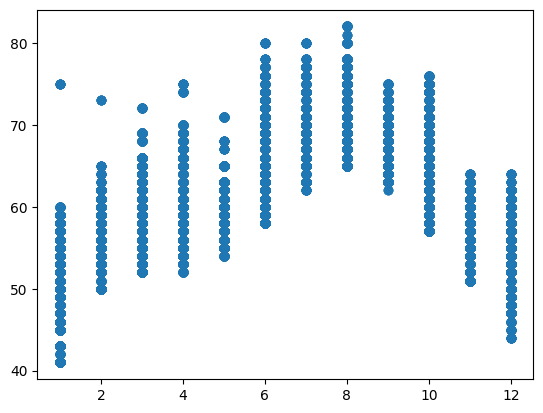

In [ ]:
plt.scatter(data['month'], data['Mean_TemperatureF'], label='month')

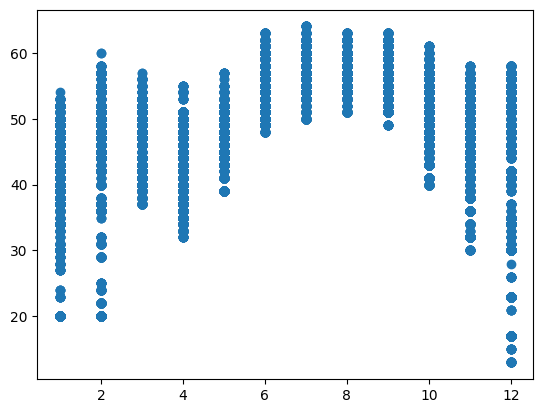

In [ ]:
plt.scatter(data['month'], data['MeanDew_PointF'], label='month')

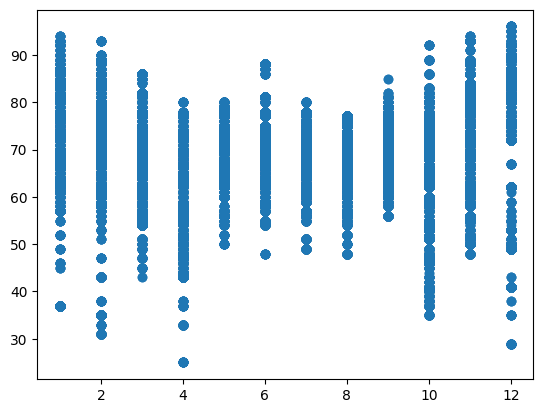

In [ ]:
plt.scatter(data['month'], data['Mean_Humidity'], label='month')

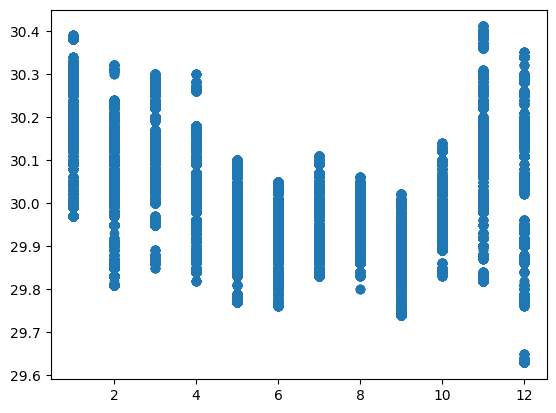

In [ ]:
plt.scatter(data['month'], data['Mean_Sea_Level_PressureIn'], label='month')

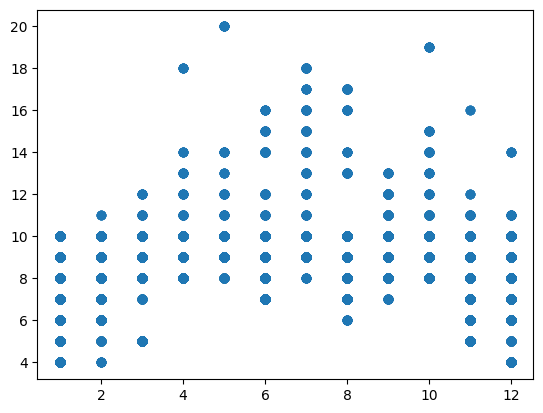

In [ ]:
plt.scatter(data['month'], data['Mean_VisibilityMiles'], label='month')

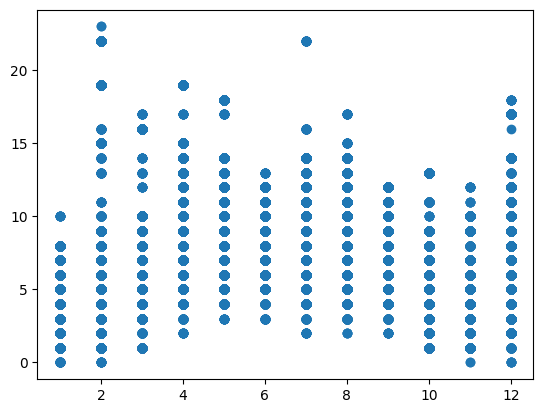

In [ ]:
plt.scatter(data['month'], data['Mean_Wind_SpeedMPH'], label='month')

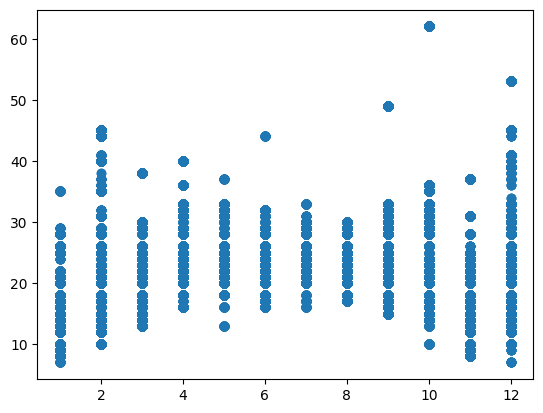

In [ ]:
plt.scatter(data['month'], data['Max_Gust_SpeedMPH'], label='month')

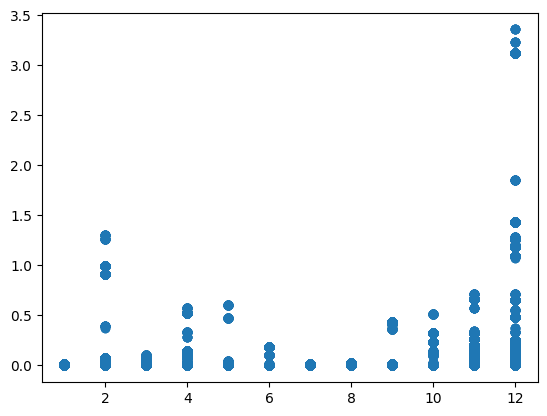

In [ ]:
plt.scatter(data['month'], data['PrecipitationIn'], label='month')

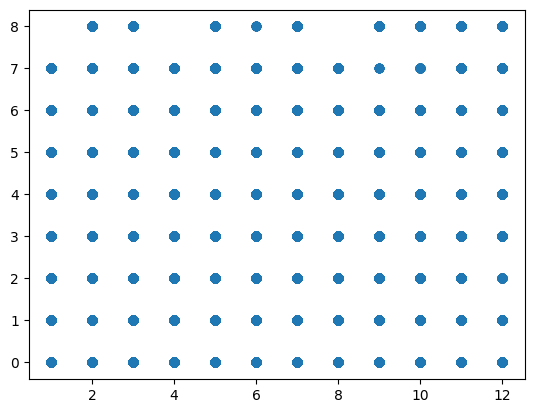

In [ ]:
plt.scatter(data['month'], data['CloudCover'], label='month')

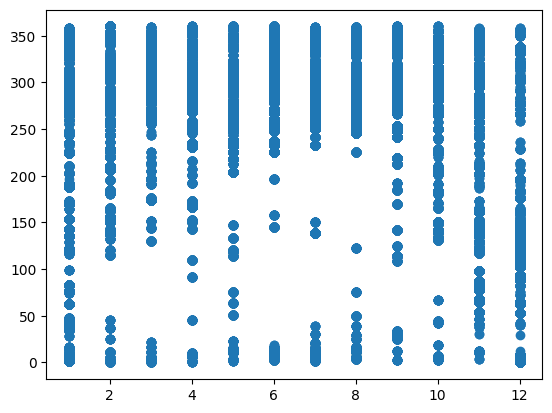

In [ ]:
plt.scatter(data['month'], data['WindDirDegrees'], label='month')

按月份分割表格并进行天气数据缺失值插补

In [ ]:
data = data.sort_values(by='month', ascending=True)#92

In [ ]:
class_list1 = list(data['month'].drop_duplicates())
class_list1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
for i in class_list1:#92-94拆分
    if i == 1:
        month1 = data[data['month']==i]
    if i == 2:
        month2 = data[data['month']==i]
    if i == 3:
        month3 = data[data['month']==i]
    if i == 4:
        month4 = data[data['month']==i]
    if i == 5:
        month5 = data[data['month']==i]
    if i == 6:
        month6 = data[data['month']==i]
    if i == 7:
        month7 = data[data['month']==i]
    if i == 8:
        month8 = data[data['month']==i]
    if i == 9:
        month9 = data[data['month']==i]
    if i == 10:
        month10 = data[data['month']==i]
    if i == 11:
        month11 = data[data['month']==i]
    if i == 12:
        month12 = data[data['month']==i]

In [ ]:
month1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16032 entries, 123744 to 840
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              16032 non-null  int64  
 1   month                      16032 non-null  int64  
 2   day                        16032 non-null  int64  
 3   hour                       16032 non-null  int64  
 4   Go_out_count               16032 non-null  float64
 5   Enter_count                16032 non-null  float64
 6   Quantity_change            16032 non-null  float64
 7   Lat                        16032 non-null  float64
 8   Long                       16032 non-null  float64
 9   Dock_Count                 16032 non-null  int64  
 10  City                       16032 non-null  int32  
 11  Mean_TemperatureF          16032 non-null  float64
 12  MeanDew_PointF             16032 non-null  float64
 13  Mean_Humidity              16032 non-null  

In [ ]:
month2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15097 entries, 174841 to 128292
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              15097 non-null  int64  
 1   month                      15097 non-null  int64  
 2   day                        15097 non-null  int64  
 3   hour                       15097 non-null  int64  
 4   Go_out_count               15097 non-null  float64
 5   Enter_count                15097 non-null  float64
 6   Quantity_change            15097 non-null  float64
 7   Lat                        15097 non-null  float64
 8   Long                       15097 non-null  float64
 9   Dock_Count                 15097 non-null  int64  
 10  City                       15097 non-null  int32  
 11  Mean_TemperatureF          15097 non-null  float64
 12  MeanDew_PointF             15097 non-null  float64
 13  Mean_Humidity              15097 non-nul

In [ ]:
month3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17534 entries, 76923 to 124312
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              17534 non-null  int64  
 1   month                      17534 non-null  int64  
 2   day                        17534 non-null  int64  
 3   hour                       17534 non-null  int64  
 4   Go_out_count               17534 non-null  float64
 5   Enter_count                17534 non-null  float64
 6   Quantity_change            17534 non-null  float64
 7   Lat                        17534 non-null  float64
 8   Long                       17534 non-null  float64
 9   Dock_Count                 17534 non-null  int64  
 10  City                       17534 non-null  int32  
 11  Mean_TemperatureF          17534 non-null  float64
 12  MeanDew_PointF             17534 non-null  float64
 13  Mean_Humidity              17534 non-null

In [ ]:
month4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16947 entries, 43250 to 80453
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              16947 non-null  int64  
 1   month                      16947 non-null  int64  
 2   day                        16947 non-null  int64  
 3   hour                       16947 non-null  int64  
 4   Go_out_count               16947 non-null  float64
 5   Enter_count                16947 non-null  float64
 6   Quantity_change            16947 non-null  float64
 7   Lat                        16947 non-null  float64
 8   Long                       16947 non-null  float64
 9   Dock_Count                 16947 non-null  int64  
 10  City                       16947 non-null  int32  
 11  Mean_TemperatureF          16947 non-null  float64
 12  MeanDew_PointF             16947 non-null  float64
 13  Mean_Humidity              16947 non-null 

In [ ]:
month5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16612 entries, 91326 to 161918
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              16612 non-null  int64  
 1   month                      16612 non-null  int64  
 2   day                        16612 non-null  int64  
 3   hour                       16612 non-null  int64  
 4   Go_out_count               16612 non-null  float64
 5   Enter_count                16612 non-null  float64
 6   Quantity_change            16612 non-null  float64
 7   Lat                        16612 non-null  float64
 8   Long                       16612 non-null  float64
 9   Dock_Count                 16612 non-null  int64  
 10  City                       16612 non-null  int32  
 11  Mean_TemperatureF          16546 non-null  float64
 12  MeanDew_PointF             16546 non-null  float64
 13  Mean_Humidity              16546 non-null

In [ ]:
month6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17147 entries, 126610 to 153962
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              17147 non-null  int64  
 1   month                      17147 non-null  int64  
 2   day                        17147 non-null  int64  
 3   hour                       17147 non-null  int64  
 4   Go_out_count               17147 non-null  float64
 5   Enter_count                17147 non-null  float64
 6   Quantity_change            17147 non-null  float64
 7   Lat                        17147 non-null  float64
 8   Long                       17147 non-null  float64
 9   Dock_Count                 17147 non-null  int64  
 10  City                       17147 non-null  int32  
 11  Mean_TemperatureF          17147 non-null  float64
 12  MeanDew_PointF             17147 non-null  float64
 13  Mean_Humidity              17147 non-nul

In [ ]:
month7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17757 entries, 16455 to 138410
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              17757 non-null  int64  
 1   month                      17757 non-null  int64  
 2   day                        17757 non-null  int64  
 3   hour                       17757 non-null  int64  
 4   Go_out_count               17757 non-null  float64
 5   Enter_count                17757 non-null  float64
 6   Quantity_change            17757 non-null  float64
 7   Lat                        17757 non-null  float64
 8   Long                       17757 non-null  float64
 9   Dock_Count                 17757 non-null  int64  
 10  City                       17757 non-null  int32  
 11  Mean_TemperatureF          17757 non-null  float64
 12  MeanDew_PointF             17757 non-null  float64
 13  Mean_Humidity              17757 non-null

In [ ]:
month8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17401 entries, 194219 to 81457
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              17401 non-null  int64  
 1   month                      17401 non-null  int64  
 2   day                        17401 non-null  int64  
 3   hour                       17401 non-null  int64  
 4   Go_out_count               17401 non-null  float64
 5   Enter_count                17401 non-null  float64
 6   Quantity_change            17401 non-null  float64
 7   Lat                        17401 non-null  float64
 8   Long                       17401 non-null  float64
 9   Dock_Count                 17401 non-null  int64  
 10  City                       17401 non-null  int32  
 11  Mean_TemperatureF          17387 non-null  float64
 12  MeanDew_PointF             17387 non-null  float64
 13  Mean_Humidity              17387 non-null

In [ ]:
month9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17196 entries, 9528 to 118261
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              17196 non-null  int64  
 1   month                      17196 non-null  int64  
 2   day                        17196 non-null  int64  
 3   hour                       17196 non-null  int64  
 4   Go_out_count               17196 non-null  float64
 5   Enter_count                17196 non-null  float64
 6   Quantity_change            17196 non-null  float64
 7   Lat                        17196 non-null  float64
 8   Long                       17196 non-null  float64
 9   Dock_Count                 17196 non-null  int64  
 10  City                       17196 non-null  int32  
 11  Mean_TemperatureF          17196 non-null  float64
 12  MeanDew_PointF             17138 non-null  float64
 13  Mean_Humidity              17138 non-null 

In [ ]:
month10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18037 entries, 195860 to 181906
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              18037 non-null  int64  
 1   month                      18037 non-null  int64  
 2   day                        18037 non-null  int64  
 3   hour                       18037 non-null  int64  
 4   Go_out_count               18037 non-null  float64
 5   Enter_count                18037 non-null  float64
 6   Quantity_change            18037 non-null  float64
 7   Lat                        18037 non-null  float64
 8   Long                       18037 non-null  float64
 9   Dock_Count                 18037 non-null  int64  
 10  City                       18037 non-null  int32  
 11  Mean_TemperatureF          18037 non-null  float64
 12  MeanDew_PointF             18004 non-null  float64
 13  Mean_Humidity              18004 non-nul

In [ ]:
month11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15014 entries, 130424 to 12330
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              15014 non-null  int64  
 1   month                      15014 non-null  int64  
 2   day                        15014 non-null  int64  
 3   hour                       15014 non-null  int64  
 4   Go_out_count               15014 non-null  float64
 5   Enter_count                15014 non-null  float64
 6   Quantity_change            15014 non-null  float64
 7   Lat                        15014 non-null  float64
 8   Long                       15014 non-null  float64
 9   Dock_Count                 15014 non-null  int64  
 10  City                       15014 non-null  int32  
 11  Mean_TemperatureF          15014 non-null  float64
 12  MeanDew_PointF             14910 non-null  float64
 13  Mean_Humidity              14910 non-null

In [ ]:
month12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13382 entries, 188968 to 59907
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Start_Station              13382 non-null  int64  
 1   month                      13382 non-null  int64  
 2   day                        13382 non-null  int64  
 3   hour                       13382 non-null  int64  
 4   Go_out_count               13382 non-null  float64
 5   Enter_count                13382 non-null  float64
 6   Quantity_change            13382 non-null  float64
 7   Lat                        13382 non-null  float64
 8   Long                       13382 non-null  float64
 9   Dock_Count                 13382 non-null  int64  
 10  City                       13382 non-null  int32  
 11  Mean_TemperatureF          13382 non-null  float64
 12  MeanDew_PointF             13207 non-null  float64
 13  Mean_Humidity              13207 non-null

In [ ]:
month1.fillna(month1.median(), inplace=True)
month2.fillna(month2.median(), inplace=True)
month3.fillna(month3.median(), inplace=True)
month4.fillna(month4.median(), inplace=True)
month5.fillna(month5.median(), inplace=True)
month6.fillna(month6.median(), inplace=True)
month7.fillna(month7.median(), inplace=True)
month8.fillna(month8.median(), inplace=True)
month9.fillna(month9.median(), inplace=True)
month10.fillna(month10.median(), inplace=True)
month11.fillna(month11.median(), inplace=True)
month12.fillna(month12.median(), inplace=True)#天气信息的空值 填充中位数（自己选择的；；平均数可能出现小数）

In [ ]:
data = pd.concat([month1, month2])
data = pd.concat([data, month3])
data = pd.concat([data, month4])
data = pd.concat([data, month5])
data = pd.concat([data, month6])
data = pd.concat([data, month7])
data = pd.concat([data, month8])
data = pd.concat([data, month9])
data = pd.concat([data, month10])
data = pd.concat([data, month11])
data = pd.concat([data, month12])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198156 entries, 123744 to 59907
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Start_Station              198156 non-null  int64  
 1   month                      198156 non-null  int64  
 2   day                        198156 non-null  int64  
 3   hour                       198156 non-null  int64  
 4   Go_out_count               198156 non-null  float64
 5   Enter_count                198156 non-null  float64
 6   Quantity_change            198156 non-null  float64
 7   Lat                        198156 non-null  float64
 8   Long                       198156 non-null  float64
 9   Dock_Count                 198156 non-null  int64  
 10  City                       198156 non-null  int32  
 11  Mean_TemperatureF          198156 non-null  float64
 12  MeanDew_PointF             198156 non-null  float64
 13  Mean_Humidity            

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Start_Station,198156.0,55.316327,22.101929,2.000000,45.000000,60.000000,71.000000,90.000000
month,198156.0,6.444100,3.357149,1.000000,4.000000,6.000000,9.000000,12.000000
day,198156.0,15.635429,8.702752,1.000000,8.000000,16.000000,23.000000,31.000000
hour,198156.0,13.416238,4.996963,0.000000,9.000000,14.000000,17.000000,23.000000
Go_out_count,198156.0,1.787238,2.583582,0.000000,0.000000,1.000000,2.000000,52.000000
Enter_count,198156.0,1.787238,2.796636,0.000000,0.000000,1.000000,2.000000,56.000000
Quantity_change,198156.0,0.000000,2.918730,-37.000000,-1.000000,0.000000,1.000000,50.000000
Lat,198156.0,37.704857,0.166645,37.329732,37.776377,37.784878,37.791464,37.804770
Long,198156.0,-122.321108,0.169324,-122.418954,-122.403452,-122.398108,-122.390288,-121.877349
Dock_Count,198156.0,18.785371,4.106013,11.000000,15.000000,19.000000,23.000000,27.000000


In [ ]:
data = data.drop(labels='Go_out_count', axis=1)
data = data.drop(labels='Enter_count', axis=1)#删除 不需要显示（中间变量）
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Start_Station,198156.0,55.316327,22.101929,2.000000,45.000000,60.000000,71.000000,90.000000
month,198156.0,6.444100,3.357149,1.000000,4.000000,6.000000,9.000000,12.000000
day,198156.0,15.635429,8.702752,1.000000,8.000000,16.000000,23.000000,31.000000
hour,198156.0,13.416238,4.996963,0.000000,9.000000,14.000000,17.000000,23.000000
Quantity_change,198156.0,0.000000,2.918730,-37.000000,-1.000000,0.000000,1.000000,50.000000
Lat,198156.0,37.704857,0.166645,37.329732,37.776377,37.784878,37.791464,37.804770
Long,198156.0,-122.321108,0.169324,-122.418954,-122.403452,-122.398108,-122.390288,-121.877349
Dock_Count,198156.0,18.785371,4.106013,11.000000,15.000000,19.000000,23.000000,27.000000
City,198156.0,0.656215,1.376069,0.000000,0.000000,0.000000,0.000000,4.000000
Mean_TemperatureF,198156.0,61.197011,6.281429,41.000000,57.000000,60.000000,66.000000,82.000000


In [ ]:
data = data.drop(labels='Max_VisibilityMiles', axis=1)
data = data.drop(labels='Min_VisibilityMiles', axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Start_Station,198156.0,55.316327,22.101929,2.000000,45.000000,60.000000,71.000000,90.000000
month,198156.0,6.444100,3.357149,1.000000,4.000000,6.000000,9.000000,12.000000
day,198156.0,15.635429,8.702752,1.000000,8.000000,16.000000,23.000000,31.000000
hour,198156.0,13.416238,4.996963,0.000000,9.000000,14.000000,17.000000,23.000000
Quantity_change,198156.0,0.000000,2.918730,-37.000000,-1.000000,0.000000,1.000000,50.000000
Lat,198156.0,37.704857,0.166645,37.329732,37.776377,37.784878,37.791464,37.804770
Long,198156.0,-122.321108,0.169324,-122.418954,-122.403452,-122.398108,-122.390288,-121.877349
Dock_Count,198156.0,18.785371,4.106013,11.000000,15.000000,19.000000,23.000000,27.000000
City,198156.0,0.656215,1.376069,0.000000,0.000000,0.000000,0.000000,4.000000
Mean_TemperatureF,198156.0,61.197011,6.281429,41.000000,57.000000,60.000000,66.000000,82.000000


In [ ]:
pd.value_counts(data['Mean_VisibilityMiles'])

10.0    144979
9.0      24670
8.0      12615
7.0       6237
6.0       4329
5.0       2564
4.0       1565
11.0       360
12.0       238
14.0       172
13.0       130
15.0        98
16.0        68
17.0        54
18.0        48
20.0        17
19.0        12
Name: Mean_VisibilityMiles, dtype: int64

观察温度等连续数据密度分布

<AxesSubplot:xlabel='Mean_TemperatureF', ylabel='Density'>

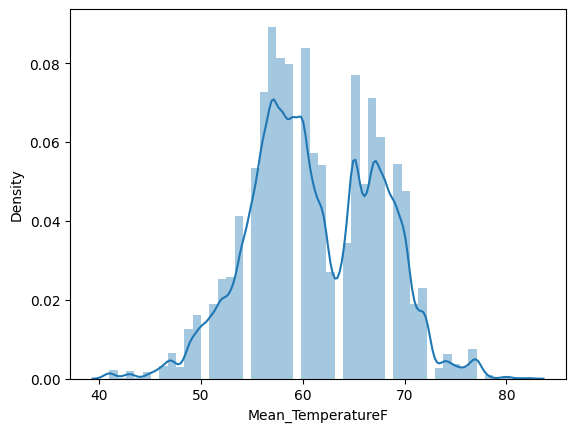

In [ ]:
sns.distplot(data['Mean_TemperatureF'])#天气信息 查看分布

<AxesSubplot:xlabel='MeanDew_PointF', ylabel='Density'>

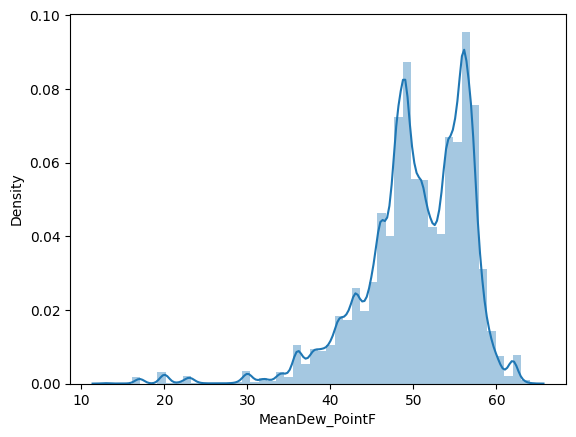

In [ ]:
sns.distplot(data['MeanDew_PointF'])

<AxesSubplot:xlabel='Mean_Humidity', ylabel='Density'>

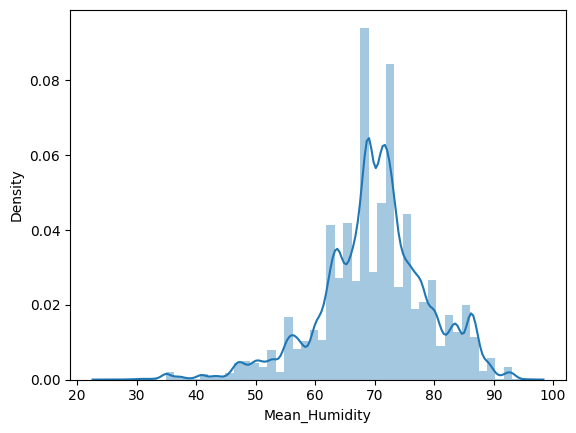

In [ ]:
sns.distplot(data['Mean_Humidity'])

<AxesSubplot:xlabel='Mean_Sea_Level_PressureIn', ylabel='Density'>

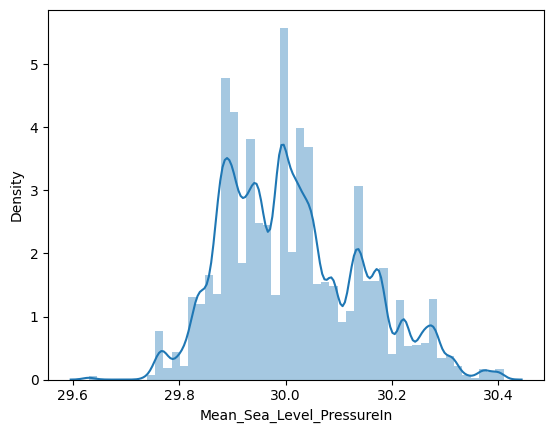

In [ ]:
sns.distplot(data['Mean_Sea_Level_PressureIn'])

<AxesSubplot:xlabel='Max_Gust_SpeedMPH', ylabel='Density'>

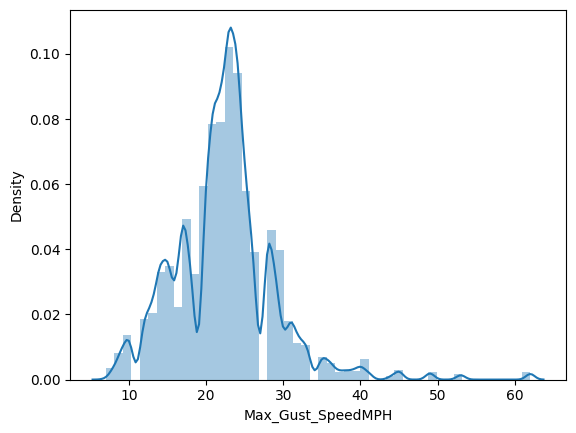

In [ ]:
sns.distplot(data['Max_Gust_SpeedMPH'])

<AxesSubplot:xlabel='PrecipitationIn', ylabel='Density'>

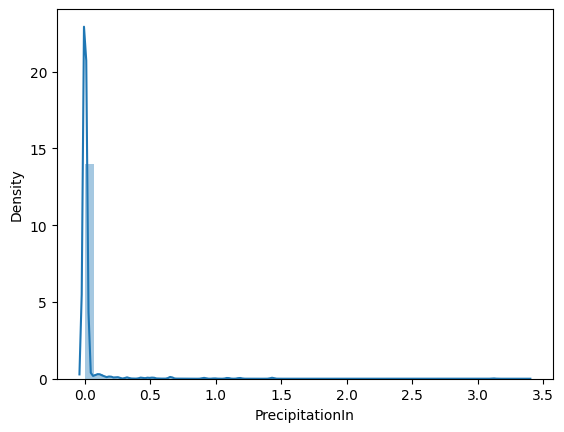

In [ ]:
sns.distplot(data['PrecipitationIn'])

<AxesSubplot:xlabel='WindDirDegrees', ylabel='Density'>

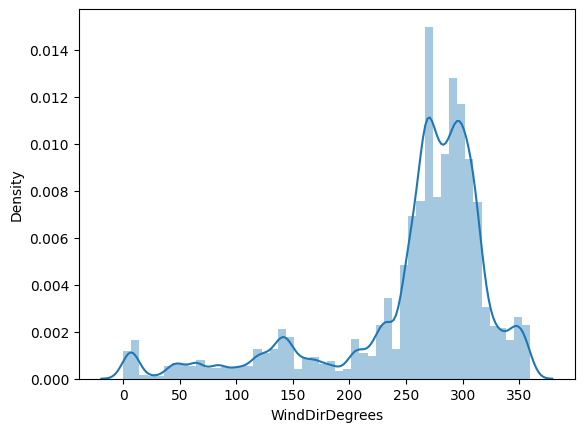

In [ ]:
sns.distplot(data['WindDirDegrees'])

<AxesSubplot:xlabel='Quantity_change', ylabel='Density'>

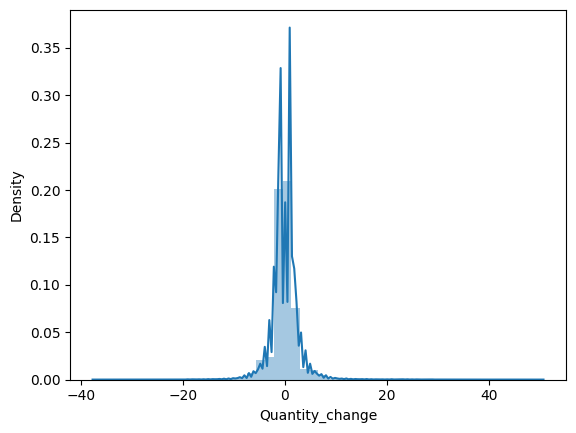

In [ ]:
sns.distplot(data['Quantity_change'])#对于需要预测的数据查看分布

<AxesSubplot:xlabel='Lat', ylabel='Density'>

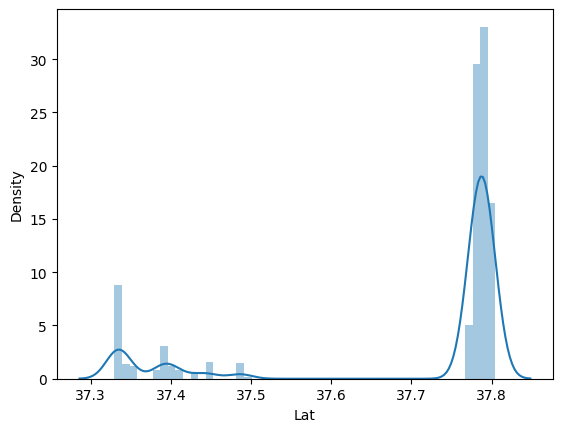

In [ ]:
sns.distplot(data['Lat'])

<AxesSubplot:xlabel='Long', ylabel='Density'>

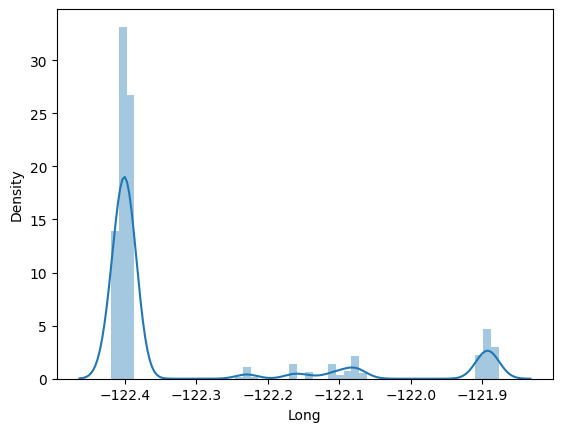

In [ ]:
sns.distplot(data['Long'])

相关系数分析

<AxesSubplot:>

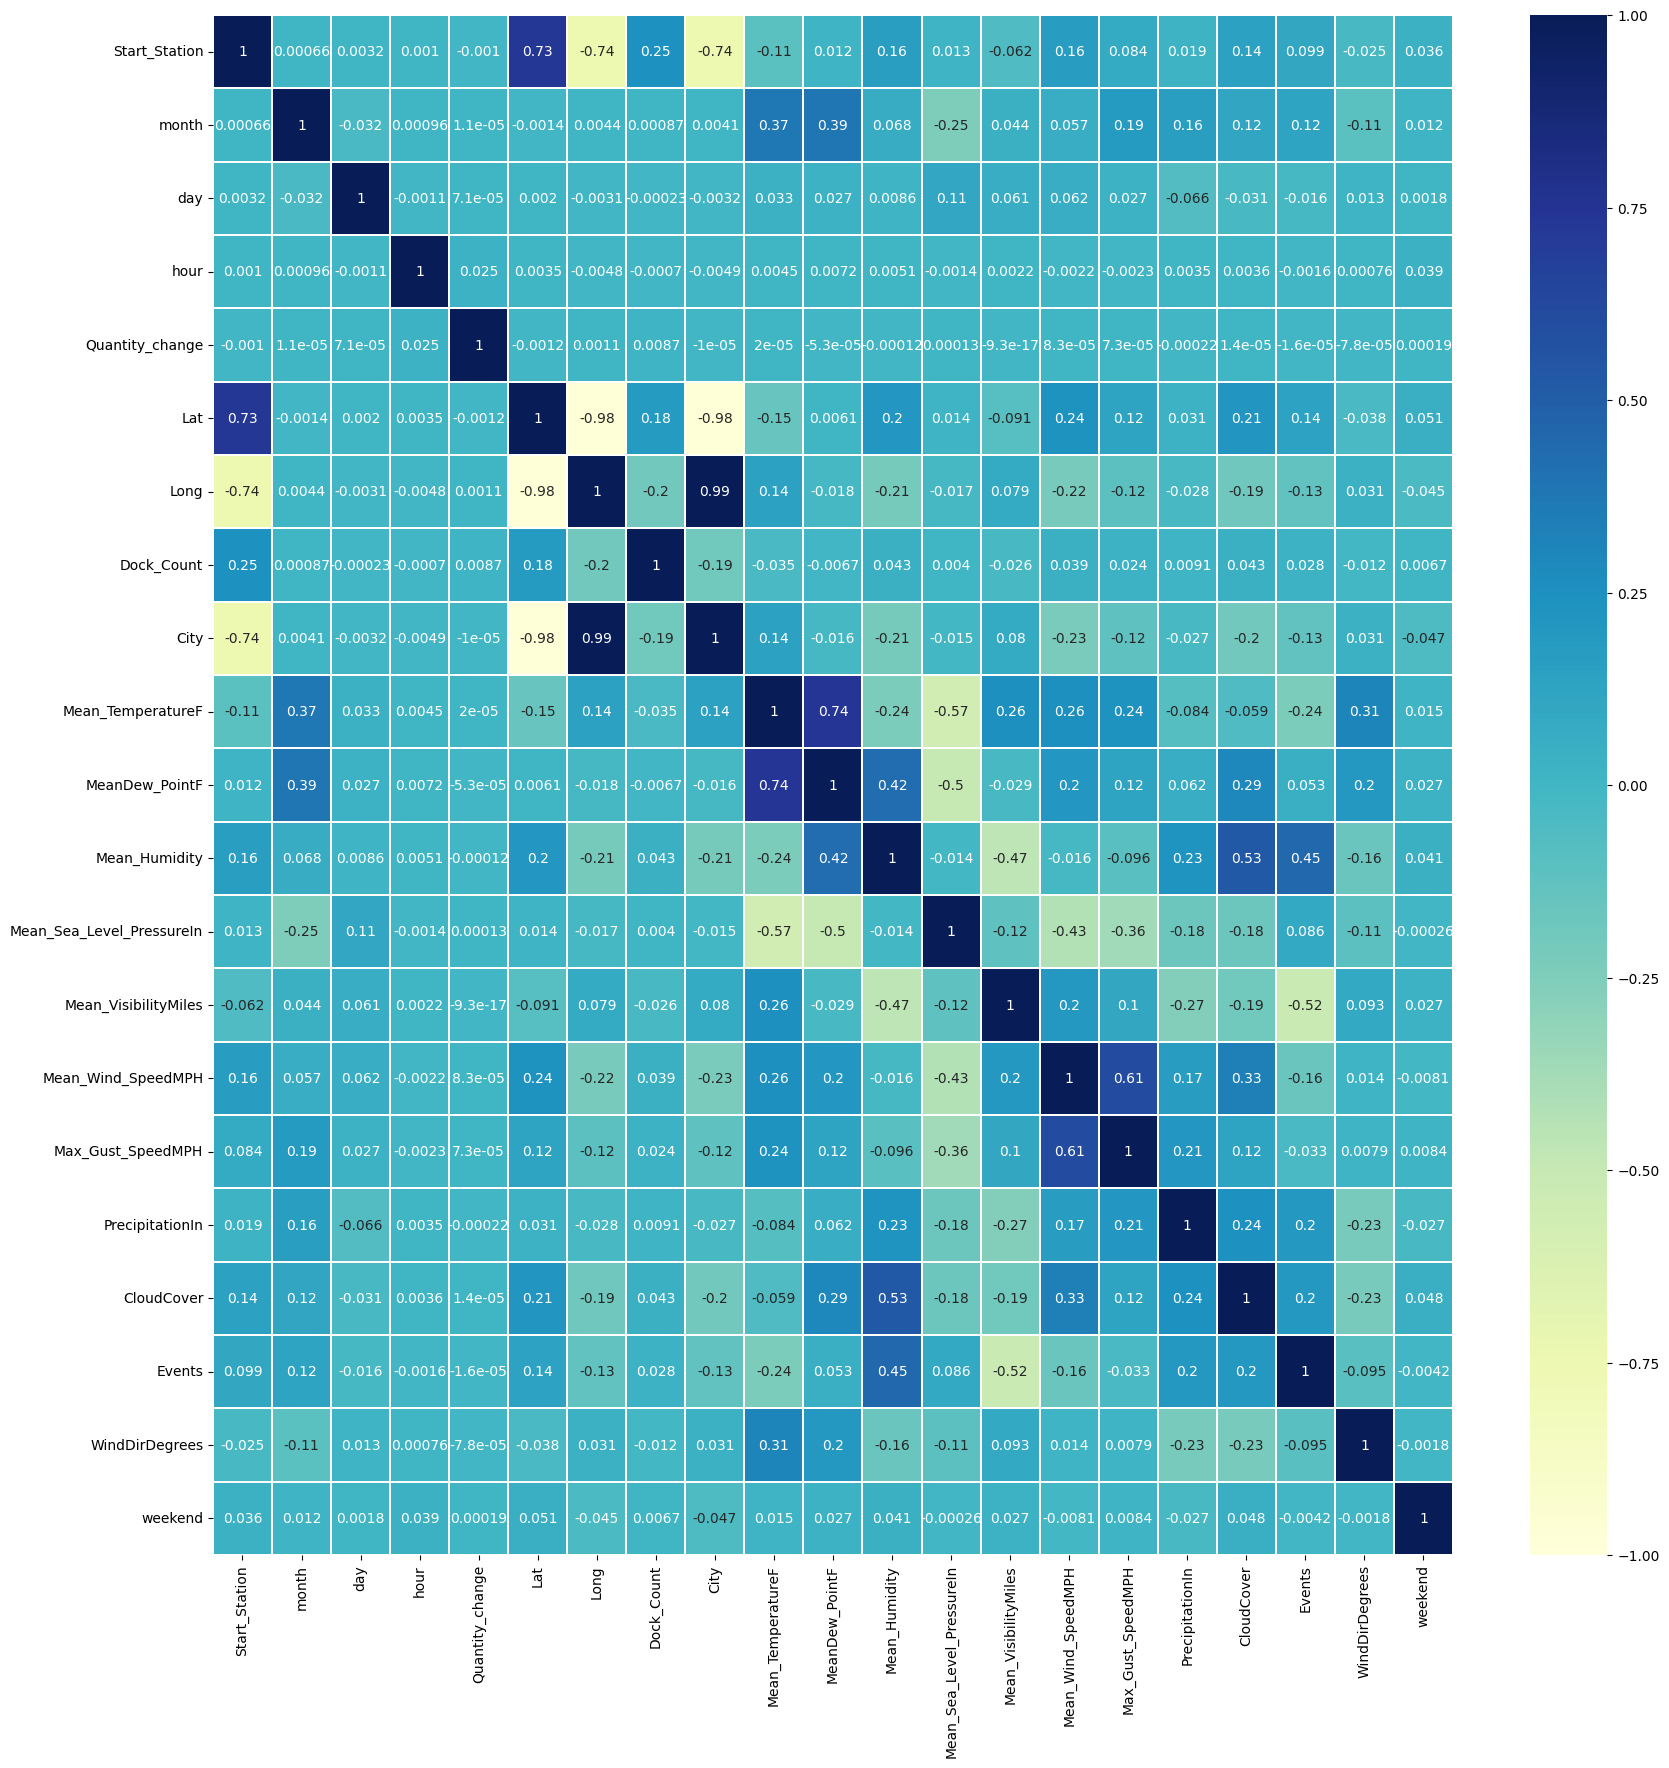

In [ ]:
corr = data.corr(method='pearson',  min_periods=1)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, vmax=1, vmin=-1, square=False, cmap='YlGnBu',
            annot=True, linewidths=.05, xticklabels=True,
            yticklabels=True)

绘制散点图，观察每一个特征与label的相关性，进行特征筛选，并离散化

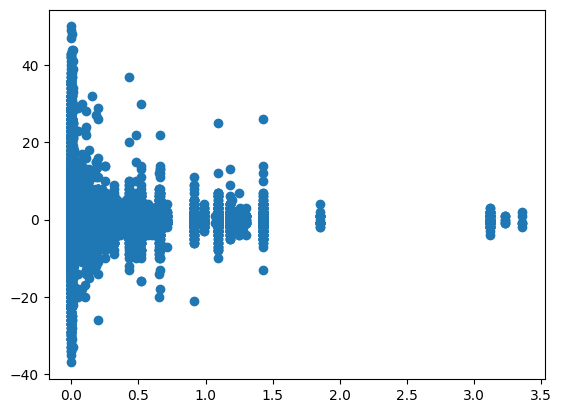

In [ ]:
plt.scatter(data['PrecipitationIn'], data['Quantity_change'], label='PrecipitationIn')

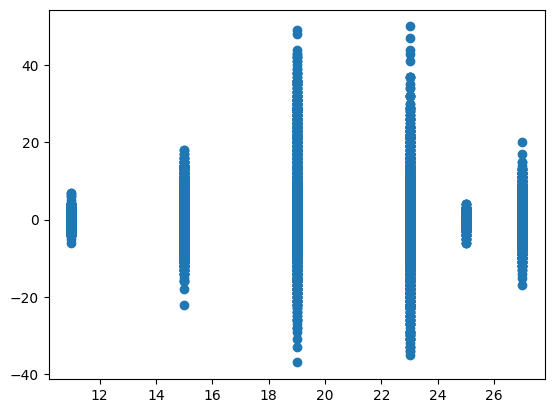

In [ ]:
plt.scatter(data['Dock_Count'], data['Quantity_change'], label='Dock_Count')

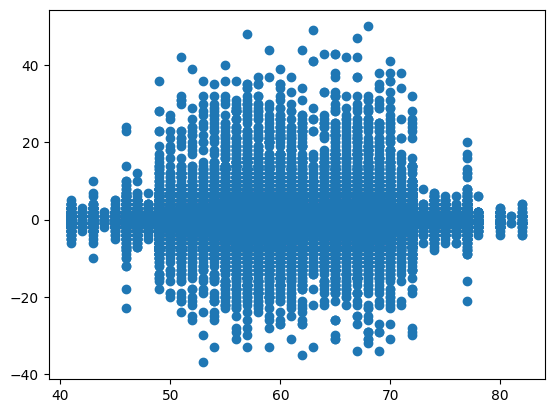

In [ ]:
plt.scatter(data['Mean_TemperatureF'], data['Quantity_change'], label='Mean_TemperatureF')

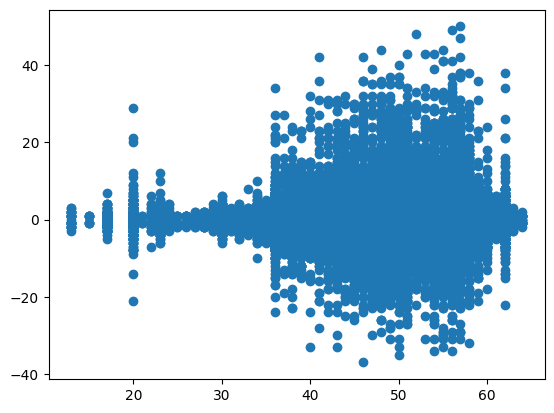

In [ ]:
plt.scatter(data['MeanDew_PointF'], data['Quantity_change'], label='MeanDew_PointF')

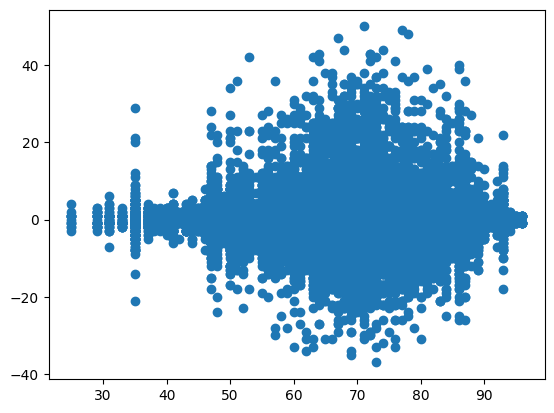

In [ ]:
plt.scatter(data['Mean_Humidity'], data['Quantity_change'], label='Mean_Humidity')

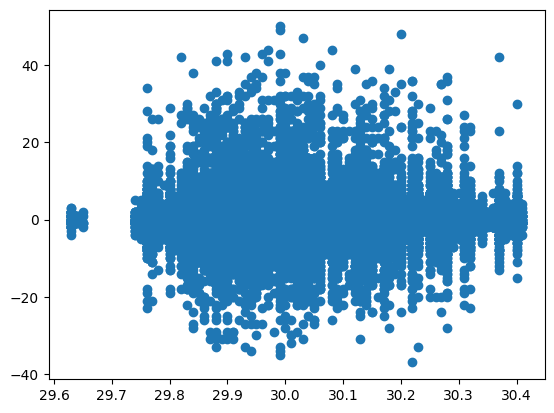

In [ ]:
plt.scatter(data['Mean_Sea_Level_PressureIn'], data['Quantity_change'], label='Mean_Sea_Level_PressureIn')

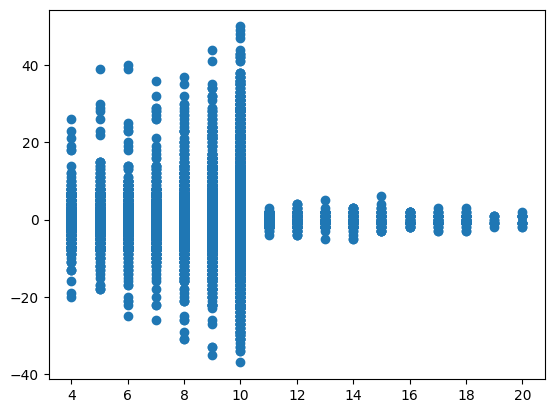

In [ ]:
plt.scatter(data['Mean_VisibilityMiles'], data['Quantity_change'], label='Mean_VisibilityMiles')

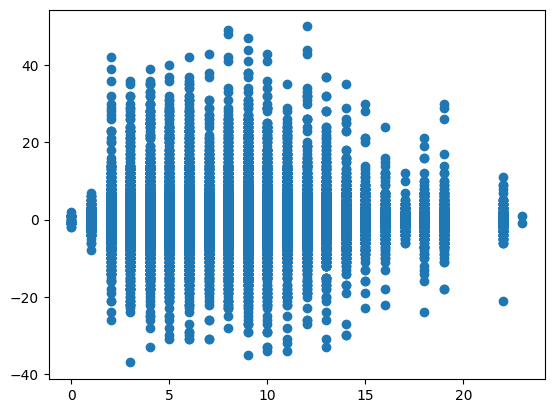

In [ ]:
plt.scatter(data['Mean_Wind_SpeedMPH'], data['Quantity_change'], label='Mean_Wind_SpeedMPH')

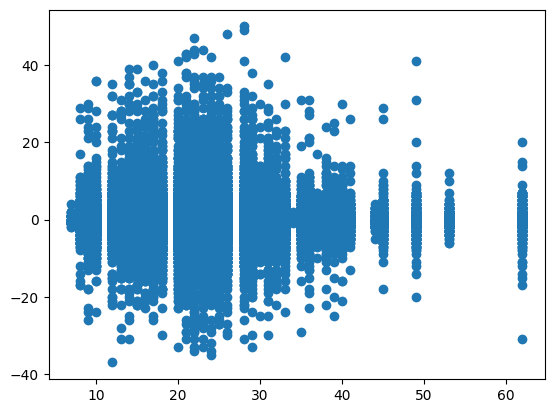

In [ ]:
plt.scatter(data['Max_Gust_SpeedMPH'], data['Quantity_change'], label='Max_Gust_SpeedMPH')

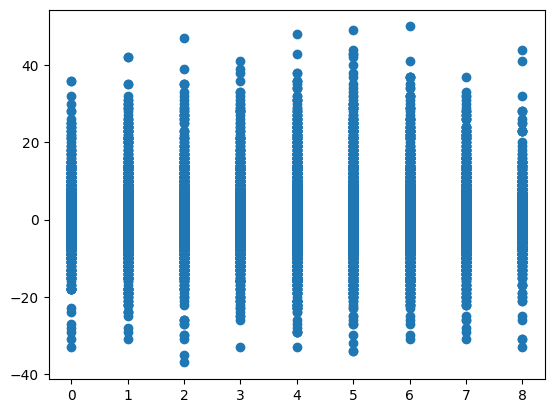

In [ ]:
plt.scatter(data['CloudCover'], data['Quantity_change'], label='CloudCover')

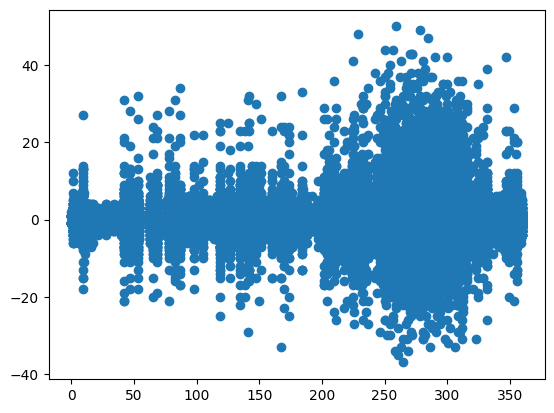

In [ ]:
plt.scatter(data['WindDirDegrees'], data['Quantity_change'], label='WindDirDegrees')

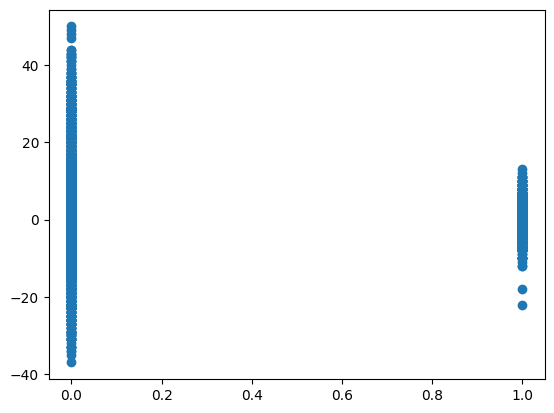

In [ ]:
plt.scatter(data['weekend'], data['Quantity_change'], label='weekend')

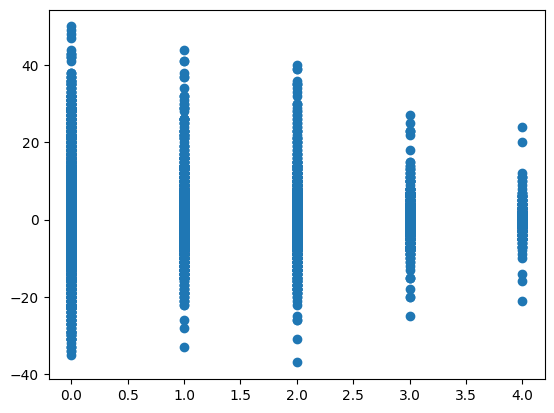

In [ ]:
plt.scatter(data['Events'], data['Quantity_change'], label='Events')

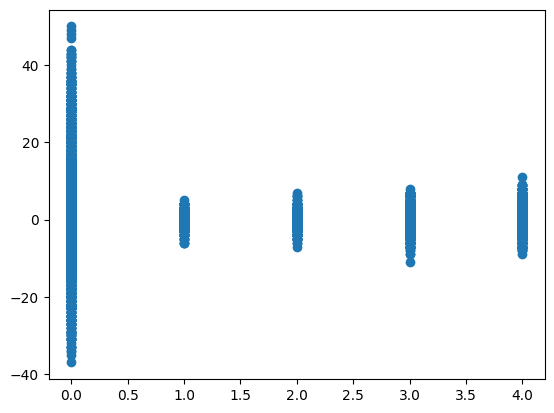

In [ ]:
plt.scatter(data['City'], data['Quantity_change'], label='City')

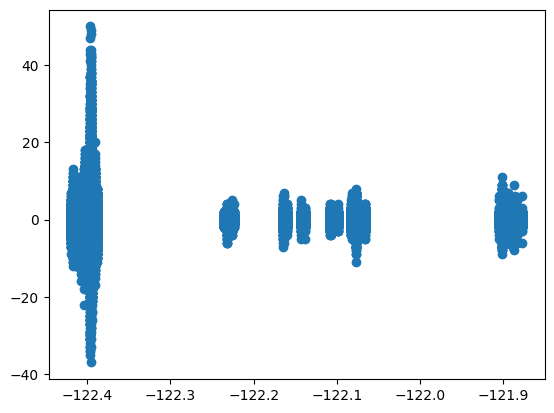

In [ ]:
plt.scatter(data['Long'], data['Quantity_change'], label='Long')

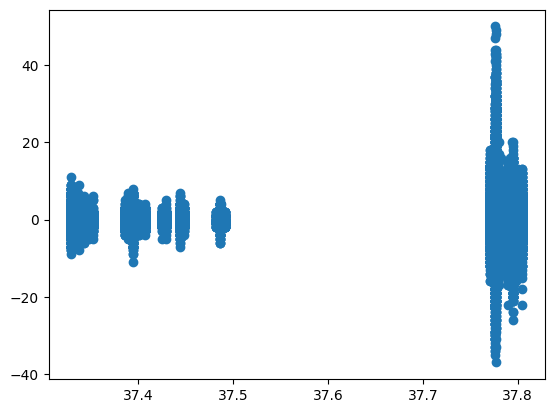

In [ ]:
plt.scatter(data['Lat'], data['Quantity_change'], label='Lat')

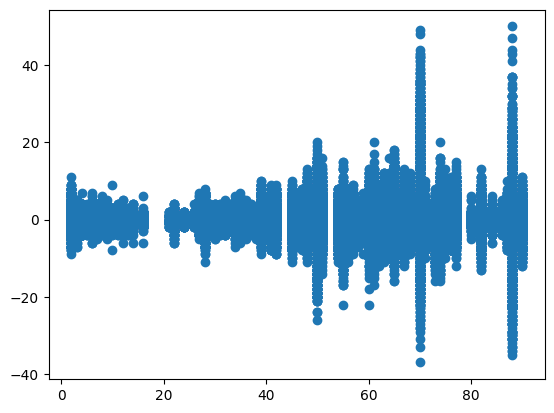

In [ ]:
plt.scatter(data['Start_Station'], data['Quantity_change'], label='Start_Station')

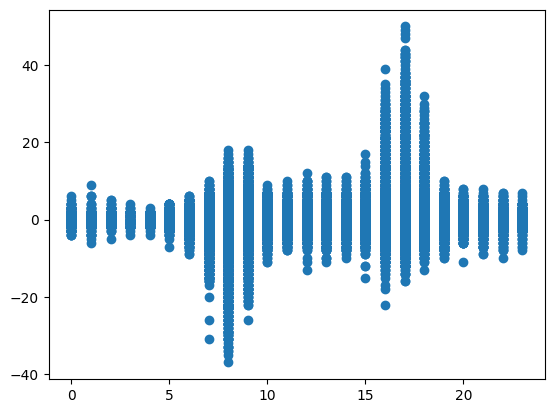

In [ ]:
plt.scatter(data['hour'], data['Quantity_change'], label='hour')

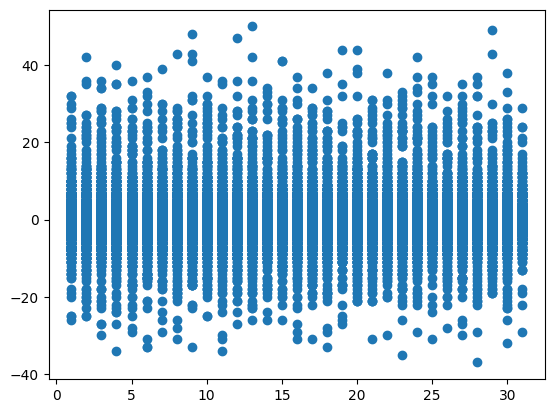

In [ ]:
plt.scatter(data['day'], data['Quantity_change'], label='day')

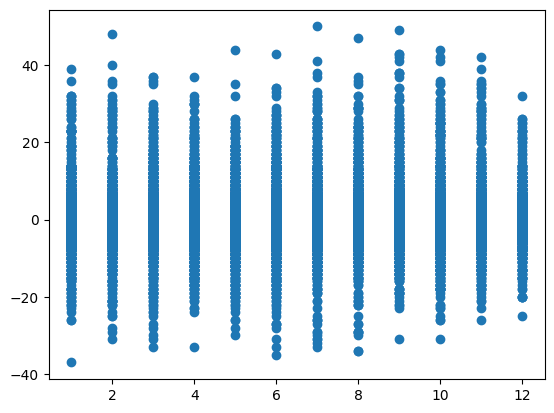

In [ ]:
plt.scatter(data['month'], data['Quantity_change'], label='month')

In [ ]:
data = data.drop(labels = ['month', 'day', 'Long', 'Lat', 'CloudCover', 'MeanDew_PointF', 'Max_Gust_SpeedMPH'], axis=1)
data#相关性不大的 删除

,Start_Station,hour,Quantity_change,Dock_Count,City,Mean_TemperatureF,Mean_Humidity,Mean_Sea_Level_PressureIn,Mean_VisibilityMiles,Mean_Wind_SpeedMPH,PrecipitationIn,Events,WindDirDegrees,weekend
123744,77,21,-1.0,27,0,50.0,84.0,30.26,4.0,3.0,0.001,3,349.0,0
13818,28,8,-1.0,23,3,56.0,74.0,30.14,8.0,2.0,0.000,0,5.0,0
13817,28,7,0.0,23,3,56.0,74.0,30.14,8.0,2.0,0.000,0,5.0,0
13816,28,21,-2.0,23,3,56.0,69.0,30.23,10.0,2.0,0.000,0,336.0,0
13815,28,19,-2.0,23,3,56.0,69.0,30.23,10.0,2.0,0.000,0,336.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52647,55,18,0.0,23,0,58.0,90.0,29.77,8.0,9.0,1.180,1,102.0,0
52648,55,6,-1.0,23,0,61.0,86.0,29.78,7.0,12.0,1.430,1,151.0,0
52649,55,7,-1.0,23,0,61.0,86.0,29.78,7.0,12.0,1.430,1,151.0,0
52629,55,8,-7.0,23,0,60.0,84.0,30.04,10.0,4.0,0.001,1,53.0,0


In [ ]:
data.loc[data['PrecipitationIn'] <= 0.3, 'PrecipitationIn']=0
data.loc[(data['PrecipitationIn'] > 0.3) & (data['PrecipitationIn'] <= 1), 'PrecipitationIn']=1
data.loc[(data['PrecipitationIn'] > 1) & (data['PrecipitationIn'] <= 2), 'PrecipitationIn']=2
data.loc[data['PrecipitationIn'] > 2, 'PrecipitationIn']=4

In [ ]:
data.loc[data['Dock_Count'] <= 14,'Dock_Count']=0
data.loc[(data['Dock_Count']> 14) & (data['Dock_Count'] <= 18),'Dock_Count']=1
data.loc[(data['Dock_Count']> 18) & (data['Dock_Count'] <= 24),'Dock_Count']=2
data.loc[(data['Dock_Count']> 24) & (data['Dock_Count'] <= 26),'Dock_Count']=3
data.loc[data['Dock_Count']> 26,'Dock_Count']=4

In [ ]:
data.loc[data['Mean_TemperatureF'] <= 48,'Mean_TemperatureF']=0
data.loc[(data['Mean_TemperatureF']> 48) & (data['Mean_TemperatureF'] <= 62),'Mean_TemperatureF']=1
data.loc[(data['Mean_TemperatureF']> 62) & (data['Mean_TemperatureF'] <= 72),'Mean_TemperatureF']=2
data.loc[data['Mean_TemperatureF']> 72,'Mean_TemperatureF']=3

In [ ]:
data.loc[data['Mean_Humidity'] <= 48,'Mean_Humidity']=0
data.loc[(data['Mean_Humidity']> 48) & (data['Mean_Humidity'] <= 60),'Mean_Humidity']=1
data.loc[(data['Mean_Humidity']> 60) & (data['Mean_Humidity'] <= 86),'Mean_Humidity']=2
data.loc[data['Mean_Humidity']> 86,'Mean_Humidity']=3

In [ ]:
data.loc[data['Mean_Sea_Level_PressureIn'] <= 29.7,'Mean_Sea_Level_PressureIn']=0
data.loc[(data['Mean_Sea_Level_PressureIn']> 29.7) & (data['Mean_Sea_Level_PressureIn'] <= 30.05),'Mean_Sea_Level_PressureIn']=1
data.loc[(data['Mean_Sea_Level_PressureIn']> 30.05) & (data['Mean_Sea_Level_PressureIn'] <= 30.3),'Mean_Sea_Level_PressureIn']=2
data.loc[data['Mean_Sea_Level_PressureIn']> 30.3,'Mean_Sea_Level_PressureIn']=3

In [ ]:
data.loc[data['Mean_VisibilityMiles'] <= 6,'Mean_Humidity']=0
data.loc[(data['Mean_VisibilityMiles'] > 6)&(data['Mean_VisibilityMiles'] <= 10),'Mean_VisibilityMiles']=1
data.loc[data['Mean_VisibilityMiles'] > 10,'Mean_Humidity']=2

In [ ]:
data.loc[data['Mean_Wind_SpeedMPH'] <= 7.5,'Mean_Wind_SpeedMPH']=0
data.loc[(data['Mean_Wind_SpeedMPH']> 7.5) & (data['Mean_Wind_SpeedMPH'] <= 20),'Mean_Wind_SpeedMPH']=1
data.loc[data['Mean_Wind_SpeedMPH']> 20,'Mean_Wind_SpeedMPH']=2

In [ ]:
data.loc[data['WindDirDegrees'] <= 200,'WindDirDegrees']=0
data.loc[(data['WindDirDegrees']> 200) & (data['WindDirDegrees'] <= 330),'WindDirDegrees']=1
data.loc[data['WindDirDegrees']>330,'WindDirDegrees']=2 #数据离散化 连续变离散

In [ ]:
data['PrecipitationIn']

123744    0.0
13818     0.0
13817     0.0
13816     0.0
13815     0.0
         ... 
52647     2.0
52648     2.0
52649     2.0
52629     0.0
59907     0.0
Name: PrecipitationIn, Length: 198156, dtype: float64

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
data

,Start_Station,hour,Quantity_change,Dock_Count,City,Mean_TemperatureF,Mean_Humidity,Mean_Sea_Level_PressureIn,Mean_VisibilityMiles,Mean_Wind_SpeedMPH,PrecipitationIn,Events,WindDirDegrees,weekend
0,77,21,-1.0,4,0,1.0,0.0,2.0,4.0,0.0,0.0,3,2.0,0
1,28,8,-1.0,2,3,1.0,2.0,2.0,1.0,0.0,0.0,0,0.0,0
2,28,7,0.0,2,3,1.0,2.0,2.0,1.0,0.0,0.0,0,0.0,0
3,28,21,-2.0,2,3,1.0,2.0,2.0,1.0,0.0,0.0,0,2.0,0
4,28,19,-2.0,2,3,1.0,2.0,2.0,1.0,0.0,0.0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198151,55,18,0.0,2,0,1.0,3.0,1.0,1.0,1.0,2.0,1,0.0,0
198152,55,6,-1.0,2,0,1.0,2.0,1.0,1.0,1.0,2.0,1,0.0,0
198153,55,7,-1.0,2,0,1.0,2.0,1.0,1.0,1.0,2.0,1,0.0,0
198154,55,8,-7.0,2,0,1.0,2.0,1.0,1.0,0.0,0.0,1,0.0,0


<AxesSubplot:>

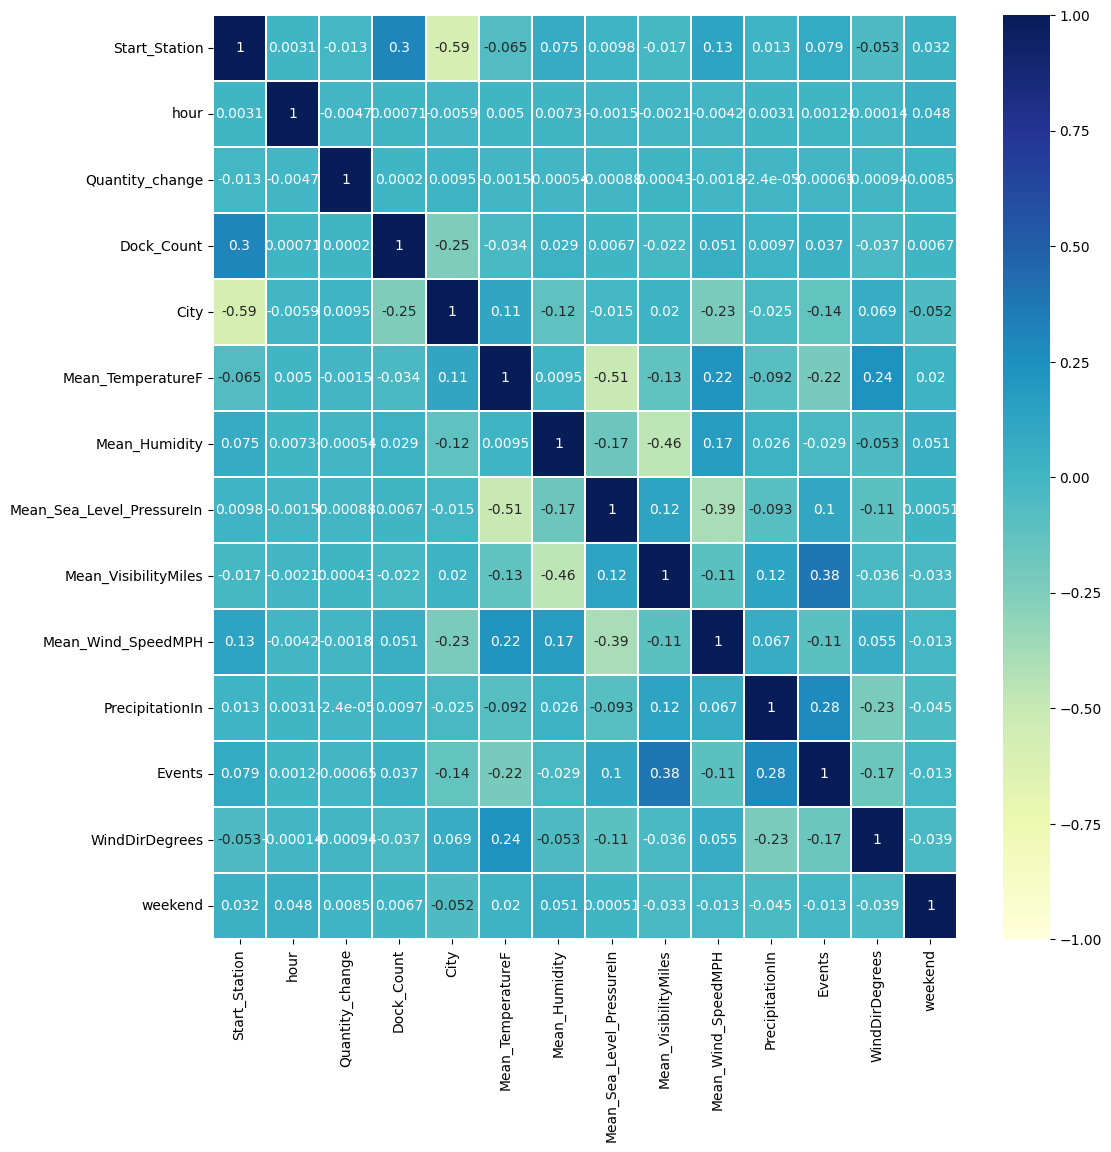

In [ ]:
corr = data.corr(method='spearman',  min_periods=1)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, vmax=1, vmin=-1, square=False, cmap='YlGnBu',
            annot=True, linewidths=.05, xticklabels=True,
            yticklabels=True)#离散化之后 相关性依然很低 第三行是需要的数据

In [ ]:
pd.value_counts(data['Quantity_change'])

-1.0     50481
 1.0     48284
 0.0     24042
-2.0     19010
 2.0     18261
         ...  
-35.0        1
-32.0        1
 48.0        1
 50.0        1
 47.0        1
Name: Quantity_change, Length: 85, dtype: int64

In [ ]:
pd.value_counts(data['Mean_TemperatureF'])

1.0    115557
2.0     75464
3.0      4095
0.0      3040
Name: Mean_TemperatureF, dtype: int64

In [ ]:
data10 = data

In [ ]:
result = []
for i in range(len(data10['Quantity_change'])):#讨论三种区间情况
    if (data10['Quantity_change'][i] < -20.0) or (data10['Quantity_change'][i] > 20.0):
        result.append(2)#这个区间取2（分类）
    if ((data10['Quantity_change'][i] >= -20.0) & (data10['Quantity_change'][i] < -10.0)) or ((data10['Quantity_change'][i] > 10.0) & (data10['Quantity_change'][i] <= 20.0)):
        result.append(1)
    if ((data10['Quantity_change'][i] >= -10.0) & (data10['Quantity_change'][i] <= 10.0)):
        result.append(0)

In [ ]:
result

In [ ]:
a = {'count': result}
result = pd.DataFrame(a)
result

In [ ]:
pd.value_counts(result['count'])

In [ ]:
len(result['count'])

In [ ]:
data.info()

In [ ]:
data['Mean_TemperatureF'] = data['Mean_TemperatureF'].astype(int)
data['Mean_Humidity'] = data['Mean_Humidity'].astype(int)
data['Mean_Sea_Level_PressureIn'] = data['Mean_Sea_Level_PressureIn'].astype(int)
data['Mean_VisibilityMiles'] = data['Mean_VisibilityMiles'].astype(int)
data['Mean_Wind_SpeedMPH'] = data['Mean_Wind_SpeedMPH'].astype(int)
data['PrecipitationIn'] = data['PrecipitationIn'].astype(int)
data['WindDirDegrees'] = data['WindDirDegrees'].astype(int)#浮点转整型

In [ ]:
data.info()

In [ ]:
X = data.drop(labels = ['Quantity_change'], axis=1)#Quantity_change 是我们需要的特征
y = result['count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
rfc = RandomForestClassifier(random_state=2018)
rfc = rfc.fit(X_train,y_train)
score_r = rfc.score(X_test,y_test)

In [ ]:
score_r

In [ ]:
y_pred = rfc.predict_proba(X_test)

In [ ]:
y_pred_forest = rfc.predict(X_test)

In [ ]:
pd.value_counts(y_pred_forest)

In [ ]:
pd.value_counts(y_test)

In [ ]:
y_one_hot = label_binarize(y_test, classes=np.arange(4))
y_forest_auc = roc_auc_score(y_one_hot, y_pred, average='micro')

In [ ]:
y_forest_auc

In [ ]:
Xgbc=XGBClassifier(random_state=2018)
Xgbc.fit(X_train,y_train)
y_xgbc_pred=Xgbc.predict(X_test)
Xgbc_score=accuracy_score(y_test,y_xgbc_pred)

In [ ]:
pd.value_counts(y_xgbc_pred)

In [ ]:
y_test=y_test.reset_index(drop=True)

In [ ]:
y_test

In [ ]:
num = 0
for i in range(len(y_test)):
    if (y_test[i] == y_xgbc_pred[i]):
        num += 1
num

In [ ]:
acc = num/len(y_test)

In [ ]:
acc

In [ ]:
Xgbc_score

In [ ]:
Gbdt=GradientBoostingClassifier(random_state=2018) #CBDT
Gbdt.fit(X_train,y_train)
y_Gbdt_pred = Gbdt.predict(X_test)
Gbdt_score=Gbdt.score(X_test,y_test) #准确率
# print('Gbdt_score:',Gbdt_score)

In [ ]:
Gbdt_score

In [ ]:
pd.value_counts(y_Gbdt_pred)

In [ ]:
y_one_hot = label_binarize(y_test, classes=np.arange(4))
y_xgbc_score = Xgbc.predict_proba(X_test)
y_xgbc_auc = roc_auc_score(y_one_hot, y_xgbc_score, average='micro')

In [ ]:
y_xgbc_auc